In [1]:
# importing libraries necessary
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loadings saved features that was prepared in data preparation file

from pickle import load
# load train_diagnose
train_diagnose= load(open('train_diagnose.pkl', 'rb'))
# load the fa_feature_all_locations_without_Nan data
fa_feature_all_locations_without_Nan = load(open('fa_feature_all_locations_without_Nan.pkl', 'rb'))
# load the md_feature_all_locations_without_Nan data
md_feature_all_locations_without_Nan= load(open('md_feature_all_locations_without_Nan.pkl', 'rb'))

# load the rd_feature_all_locations_without_Nan data
rd_feature_all_locations_without_Nan= load(open('rd_feature_all_locations_without_Nan.pkl', 'rb'))
# load the ad_feature_all_locations_without_Nan data
ad_feature_all_locations_without_Nan= load(open('ad_feature_all_locations_without_Nan.pkl', 'rb'))

cl_feature_all_locations_without_Nan= load(open('cl_feature_all_locations_without_Nan.pkl', 'rb'))
# load curvature_feature_all_locations_without_Nan data
curvature_feature_all_locations_without_Nan= load(open('curvature_feature_all_locations_without_Nan.pkl', 'rb'))

# load the Torision data
Torsion_feature_all_locations_without_Nan = load(open('Torsion_feature_all_locations_without_Nan.pkl', 'rb'))
# load the volume data
volume_feature_all_locations_without_Nan= load(open('volume_feature_all_locations_without_Nan.pkl', 'rb'))


In [3]:
# correcting mistakes of not using replaced nan values 
combined_features_without_Scaling=np.concatenate((fa_feature_all_locations_without_Nan,md_feature_all_locations_without_Nan,rd_feature_all_locations_without_Nan, 
                        ad_feature_all_locations_without_Nan,cl_feature_all_locations_without_Nan,curvature_feature_all_locations_without_Nan,
                        Torsion_feature_all_locations_without_Nan,volume_feature_all_locations_without_Nan),axis=1)


In [4]:
# combining Features and train diagnose 
CombinedFeatDig=np.concatenate((combined_features_without_Scaling,train_diagnose),axis=1)

In [5]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [6]:
# Creating x and Y for each classes
NC_data_x = CombinedFeatDig[:,0:16000][NC]
NC_data_y = CombinedFeatDig[:,-1][NC]
print("-"*60)
print("Normal Control shape:",NC_data_x.shape)
print("Normal Control lable shape:",NC_data_y.shape)


NMCI_data_x =CombinedFeatDig[:,0:16000][NMCI]
NMCI_data_y = CombinedFeatDig[:,-1][NMCI]
print("-"*60)
print("NMCI shape:",NMCI_data_x.shape)
print("NMCI Y label:",NMCI_data_y.shape)

AD_data_x = CombinedFeatDig[:,0:16000][AD]
AD_data_y = CombinedFeatDig[:,-1][AD]
print("-"*60)
print("Alzheimer Disease shape :",AD_data_x.shape)
print("Alzheimer Disease Y label shape :",AD_data_y.shape)


------------------------------------------------------------
Normal Control shape: (235, 16000)
Normal Control lable shape: (235,)
------------------------------------------------------------
NMCI shape: (215, 16000)
NMCI Y label: (215,)
------------------------------------------------------------
Alzheimer Disease shape : (250, 16000)
Alzheimer Disease Y label shape : (250,)


In [5]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [6]:
# Creating x and Y for each classes
NC_data_x = CombinedFeatDig[:,0:16000][NC]
NC_data_y = CombinedFeatDig[:,-1][NC]
print("-"*60)
print("Normal Control shape:",NC_data_x.shape)
print("Normal Control lable shape:",NC_data_y.shape)


NMCI_data_x =CombinedFeatDig[:,0:16000][NMCI]
NMCI_data_y = CombinedFeatDig[:,-1][NMCI]
print("-"*60)
print("NMCI shape:",NMCI_data_x.shape)
print("NMCI Y label:",NMCI_data_y.shape)

AD_data_x = CombinedFeatDig[:,0:16000][AD]
AD_data_y = CombinedFeatDig[:,-1][AD]
print("-"*60)
print("Alzheimer Disease shape :",AD_data_x.shape)
print("Alzheimer Disease Y label shape :",AD_data_y.shape)


------------------------------------------------------------
Normal Control shape: (235, 16000)
Normal Control lable shape: (235,)
------------------------------------------------------------
NMCI shape: (215, 16000)
NMCI Y label: (215,)
------------------------------------------------------------
Alzheimer Disease shape : (250, 16000)
Alzheimer Disease Y label shape : (250,)


# AD vs Normal Control Training

In [7]:
# combining Ad vs Normal for classification
ADvsNC_X=np.concatenate((AD_data_x, NC_data_x), axis=0)
print(ADvsNC_X.shape)

ADvsNC_Y=np.concatenate((AD_data_y, NC_data_y), axis=0)
print(ADvsNC_Y.shape)

(485, 16000)
(485,)


In [8]:
# changing ad=1 and nc=0
where_3 = np.where(ADvsNC_Y== 3)
where_1 = np.where(ADvsNC_Y == 1)

ADvsNC_Y[where_3] = 1
ADvsNC_Y[where_1] = 0
ADvsNC_Y.shape


(485,)

In [9]:
# split data into training 70, validation10 and test sets20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNC_X, ADvsNC_Y, test_size=0.20, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=123)

In [10]:
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)

Alzheimer's diseas and Normal Train shape : (349, 16000)
Alzheimer's diseas and Normal Validation shape : (39, 16000)
Alzheimer's diseas and Normal Test shape : (97, 16000)


In [11]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
# scaler =StandardScaler()
# scaler = MinMaxScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_val)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
scaler.fit(X_test)
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)
print("Std of test set : ", np.std(X_test))
print("Mean of test set: ",np.mean(X_test))



Alzheimer's diseas and Normal Train shape : (349, 16000)
Alzheimer's diseas and Normal Validation shape : (39, 16000)
Alzheimer's diseas and Normal Test shape : (97, 16000)
Std of test set :  0.270620484180649
Mean of test set:  0.4122653306433417


In [12]:
%%time
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score

# intializing clasisfiers into teh classifier list.
classifiers = [
    SVC(random_state=25,probability=True,class_weight='balanced'),
    DecisionTreeClassifier(random_state=25),
    RandomForestClassifier(random_state=25),
    XGBClassifier(random_state=25),
    ]


# models columns name to save ths results into
models_cols=["Classifiers", "Accuracy","F1_score_NC", "F1_score_AD"]
models_df = pd.DataFrame(columns=models_cols)

# for loop through classifiers to fit the train set and  and test in on test set and appedning the result into model_df .
for models in classifiers:
#     fitting the trin set
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
#     
    print('****Results****')
#     applying it into test to measure the accuracy , f1_score.
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)

SVC
****Results****
Training 92.26%
Accuracy 77.32%
F1_Score of NC: 68.57%
F1_Score of AD: 82.26%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 55.67%
F1_Score of NC: 39.44%
F1_Score of AD: 65.04%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 61.86%
F1_Score of NC: 66.06%
F1_Score of AD: 56.47%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:06:58] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 72.16%
F1_Score of NC: 72.16%
F1_Score of AD: 72.16%
CPU times: user 1min 20s, sys: 2.65 s, total: 1min 22s
Wall time: 33 s


Text(0.5, 1.0, 'AUC score of AD vs Normal Control Before PCA of NC vs AD')

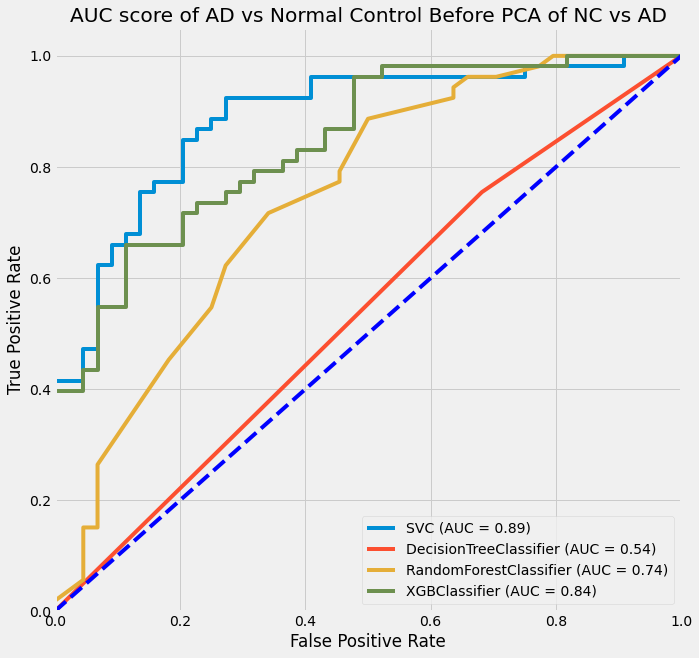

In [13]:
# plotting the ROC  before applying PCA
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control Before PCA of NC vs AD')

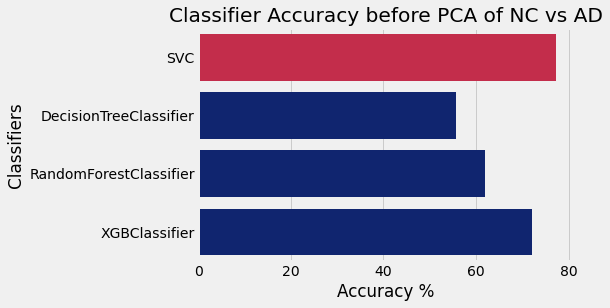

In [14]:
# plotting the accuracy score
import pandas as pd
from sklearn.decomposition import PCA
# custom color method to highlight the highest accuracy into other color.
def set_custom_palette(series, max_color = 'crimson', other_color = 'b'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal

sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['Accuracy'])
sns.barplot(x='Accuracy', y='Classifiers', data=models_df,palette=clrs, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy before PCA of NC vs AD')
plt.show()



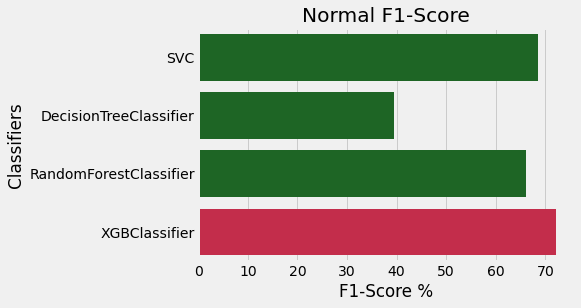

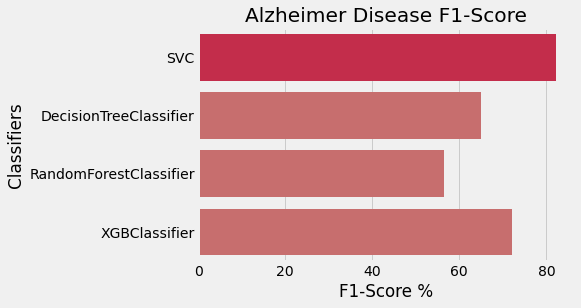

In [15]:
# plotting F1_score before applying  PCA

sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NC'],other_color = 'g')
sns.barplot(x='F1_score_NC', y='Classifiers', data=models_df,palette=clrs, color="g")

plt.xlabel('F1-Score %')
plt.title('Normal F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],other_color = 'r')
sns.barplot(x='F1_score_AD', y='Classifiers', data=models_df,palette=clrs, color="r")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()



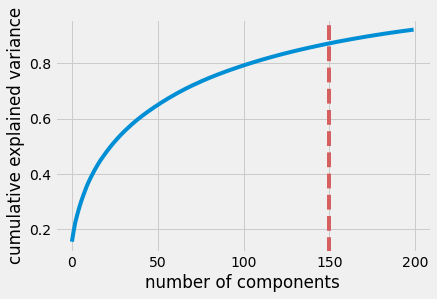

None

,Cumulative Variance Ratio,Explained Variance Ratio
0,0.155502,0.155502
1,0.193390,0.037888
2,0.226151,0.032760
3,0.250267,0.024116
4,0.272595,0.022328
...,...,...
195,0.917575,0.000830
196,0.918402,0.000826
197,0.919220,0.000818
198,0.920036,0.000816


In [16]:
# plotting and testing pcA
pca_test = PCA(n_components=200)
pca_test.fit(X_train)

plt.style.use('fivethirtyeight')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=150, ymin=0, ymax=1)
display(plt.show())
evr = pca_test.explained_variance_ratio_
cvr = np.cumsum(pca_test.explained_variance_ratio_)
pca_df = pd.DataFrame()
pca_df['Cumulative Variance Ratio'] = cvr
pca_df['Explained Variance Ratio'] = evr
display(pca_df.head(200))

In [17]:
from math import sqrt
# fitting Pca into training, test and validation set
pca=PCA(150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
var_exp = pca.explained_variance_ratio_
X_val_pca=pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print("Total variance explianed by 150 components:", var_exp.sum())
# looing and comparing the mean and standar deviations before and aftet PcA 
# since the mean and standard deviation have increased and is not in range of 0 and 1.applying Sclaer again in teh enxt cell
print("std of test set AFTER PCA: ", np.std(X_test_pca))
print("mean of test set AFTER PCA: ",np.mean(X_test_pca))
print("std of training set AFTER PCA: ", np.std(X_train_pca))
print("mean of training set AFTER PCA: ",np.mean(X_train_pca))
print("std of test set BEFORE PCA:: ", np.std(X_test))
print("mean of test set BEFORE PCA: ",np.mean(X_test))
print("std of training set BEFORE PCA:: ", np.std(X_test))
print("mean of training set BEFORE PCA: ",np.mean(X_test))


Total variance explianed by 150 components: 0.8686231040611843
std of test set AFTER PCA:  1.8238035761691782
mean of test set AFTER PCA:  0.03382005194650534
std of training set AFTER PCA:  1.3715103143271663
mean of training set AFTER PCA:  -2.6874395736485164e-17
std of test set BEFORE PCA::  0.270620484180649
mean of test set BEFORE PCA:  0.4122653306433417
std of training set BEFORE PCA::  0.270620484180649
mean of training set BEFORE PCA:  0.4122653306433417


In [18]:
from sklearn.preprocessing import StandardScaler
# Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))

scaler.fit(X_train_pca)
X_train_pca=scaler.transform(X_train_pca)
scaler.fit(X_val_pca)
X_val_pca=scaler.transform(X_val_pca)
X_test_pca=scaler.transform(X_test_pca)
scaler.fit(X_test_pca)
print("Std of test set : ", np.std(X_test_pca))
print("Mean of test set: ",np.mean(X_test_pca))
print("Std of training set : ", np.std(X_train_pca))
print("Mean of training set: ",np.mean(X_train_pca))

Std of test set :  0.2577477317393479
Mean of test set:  0.4827432773860222
Std of training set :  0.16779054199692106
Mean of training set:  0.45817055036412946


In [19]:
models_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)

for models in classifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    

    
    
    
print("="*30)

SVC
****Results****
Training 99.43%
Accuracy 67.01%
F1_Score of NC: 44.83%
F1_Score of AD: 76.47%
Sensitivity Score: 98.11%
Specificity Score: 29.55%
AUC Score: 84.99%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 45.36%
F1_Score of NC: 53.91%
F1_Score of AD: 32.91%
Sensitivity Score: 24.53%
Specificity Score: 70.45%
AUC Score: 47.49%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 68.04%
F1_Score of NC: 63.53%
F1_Score of AD: 71.56%
Sensitivity Score: 73.58%
Specificity Score: 61.36%
AUC Score: 70.45%
[18:07:14] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 73.20%
F1_Score of NC: 71.74%
F1_Score of AD: 74.51%
Sensitivity Score: 71.70%
Specificity Score: 75.00%
AUC Score: 82.33%


Text(0.5, 1.0, 'AUC score of AD vs Normal Control AFTER PCA of NC vs AD.')

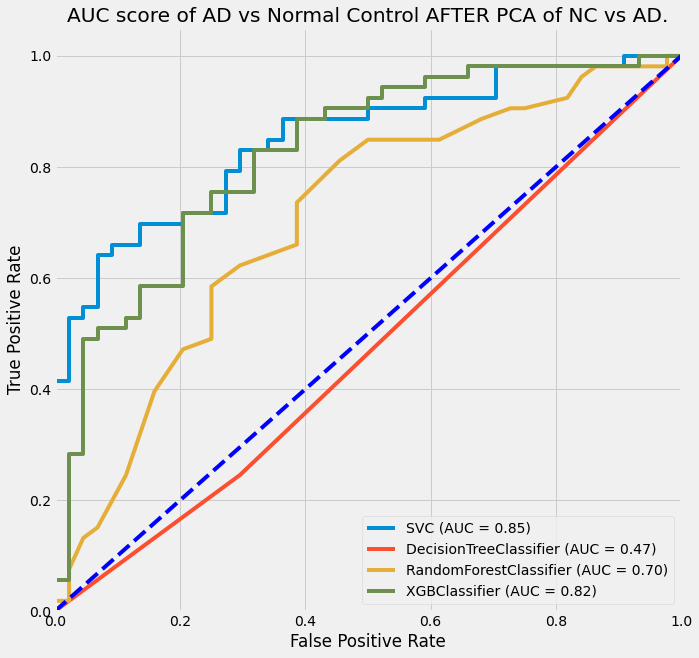

In [20]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control AFTER PCA of NC vs AD.')

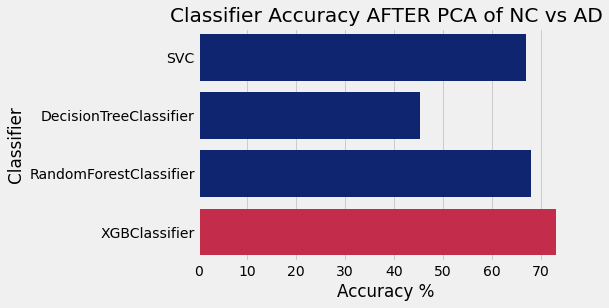

In [21]:



sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['Accuracy'])
sns.barplot(x='Accuracy', y='Classifier', data=models_df,palette=clrs, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy AFTER PCA of NC vs AD')
plt.show()



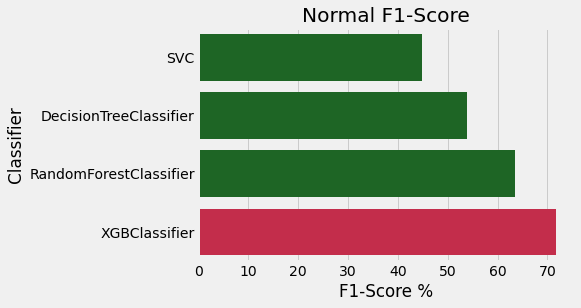

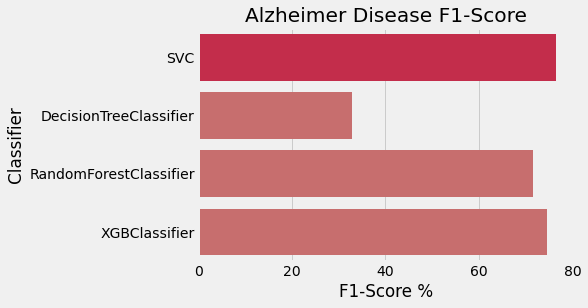

In [22]:
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NC'],other_color = 'g')
sns.barplot(x='F1_score_NC', y='Classifier', data=models_df,palette=clrs, color="g")

plt.xlabel('F1-Score %')
plt.title('Normal F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],other_color = 'r')
sns.barplot(x='F1_score_AD', y='Classifier', data=models_df,palette=clrs, color="r")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()



# AD Vs Normal Control HYPERPARAMTER TUNNING


## SVM HYPERPARAMTER TUNNING

In [23]:
%%time

from sklearn.model_selection import PredefinedSplit,GridSearchCV
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats


# Save mean cross-validated accuracy scores of best models
cross_valid_scores = {}
best_estimator_Score={}

parameters = {
    "C": [0.001, 0.01, 0.1, 1.0,1.4,1.5,2.0,2.4,3.0,4],
    "kernel": ["linear", "poly", "sigmoid","rbf"],
    "gamma": ["scale", "auto"],
    "probability":[True,False]
}

model_svc = SVC(
    random_state=25,

    
    
)

 

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
    return_train_score=True,
)


model_svc.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
       
)
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_svc.best_estimator_.score( X_val_pca, y_val.ravel()))

    
cross_valid_scores['SVM Model'] = model_svc.best_score_
best_estimator_Score['SVM Model']=model_svc.best_estimator_.score( X_val_pca, y_val.ravel())
print('-----')




-----
Best parameters {'C': 0.01, 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
Mean cross-validated accuracy score of the best_estimator: 0.739
Best estimator score on Validation set : 0.795
-----
CPU times: user 57.4 s, sys: 295 ms, total: 57.7 s
Wall time: 59 s


## Desicion Tree HYPERPARAMTER TUNNING

In [24]:
%%time
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20),
    "min_samples_split":range(2,10),
    "class_weight":["balanced",None],
    "min_samples_leaf":range(1,5)                   
}




model_desicion_tree = DecisionTreeClassifier(
    random_state=25
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_desicion_tree.best_estimator_.score( X_val_pca, y_val))
cross_valid_scores['Desicion_Tree Model'] = model_desicion_tree.best_score_

best_estimator_Score['Desicion_Tree Model']=model_desicion_tree.best_estimator_.score( X_val_pca, y_val)
print('-----')

-----
Best parameters {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.728
Best estimator score on Validation set : 0.744
-----
CPU times: user 4min 15s, sys: 1.59 s, total: 4min 17s
Wall time: 4min 22s


# Random Forest HYPERPARAMTERER TUNNING

In [25]:
%%time

parameters = {
    "criterion":["gini","entropy"],
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_features":range(5,11),
#     "bootstrap":[True,False],
    "class_weight":["balanced",None],
    "max_depth": [3, 5, 7, 9, 11, 13,None],
    
}

model_random_forest = RandomForestClassifier(
    random_state=25,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)

cross_valid_scores['Random_Forest'] = model_random_forest.best_score_

# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_random_forest.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['Random Forest Model']=model_random_forest.best_estimator_.score(X_val_pca, y_val)
print('-----')

-----
Best parameters {'class_weight': 'balanced', 'criterion': 'entropy', 'max_depth': 13, 'max_features': 9, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.679
Best estimator score on Validation set : 0.769
-----
CPU times: user 2min 38s, sys: 1.59 s, total: 2min 40s
Wall time: 2min 46s


# XGBOOST HYPERPARAMETER TUNNING

In [26]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    
}

model_xgb = XGBClassifier(
    random_state=25,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
     # add this line to slient warning message
)

model_xgb.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['XGBOOST Model'] = model_xgb.best_score_

# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_xgb.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_xgb.best_estimator_.score(X_val_pca, y_val)
print('-----')






[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:24] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:26] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:29] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:33] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:48] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:50] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:53] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:15:56] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective

In [27]:
pd.DataFrame(cross_valid_scores, index=['Best Accuracy Through Grid Search ']).T

,Best Accuracy Through Grid Search
SVM Model,0.739006
Desicion_Tree Model,0.727867
Random_Forest,0.678841
XGBOOST Model,0.742360


In [28]:
pd.DataFrame(best_estimator_Score, index=['Best Estimator Score on Validation Set']).T

,Best Estimator Score on Validation Set
SVM Model,0.794872
Desicion_Tree Model,0.743590
Random Forest Model,0.769231
XG-Boost Model,0.717949


## Applying Best Paramaters for each models after Hyper Paramater tunning.

In [29]:
# combining Training and validation set which makes training set 80% and  test set 20%
X_train_pca=np.concatenate((X_val_pca, X_train_pca), axis=0)
y_train=np.concatenate((y_val, y_train), axis=0)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)



(388, 150)
(388,)
(97, 150)


In [30]:
# applying the ebst aprameters of hyper_parameter tunning into four classifiers of sVM, decision tree and random Forest
svc_final = SVC(**model_svc.best_params_)

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(
            **model_random_forest.best_params_
)


# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_
)

# Applying best params to final xgboost
xgb_final = XGBClassifier(
        **model_xgb.best_params_)



In [31]:
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
# classfiers obtained from hyperparatmeter with tehe ebst parameters
finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
# finalClassifiers = [model_svc.best_params_, model_random_forest.best_params_, model_desicion_tree.best_params_,model_xgb.best_params_]
# craeting new df to save the result of traning and testing
final_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
final = pd.DataFrame(columns=final_cols)
# for loop that iterates over each name, model in models list
for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens,spec,auc]], columns=final_cols)
    final = final.append(final_entry )
    
print("="*30)

final

SVC
****Results****
Training 94.07%
Accuracy 77.32%
F1_Score of NC: 75.56%
F1_Score of AD: 78.85%
Sensitivity Score: 77.36%
Specificity Score: 77.27%
AUC Score: 84.86%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 69.07%
F1_Score of NC: 61.54%
F1_Score of AD: 74.14%
Sensitivity Score: 81.13%
Specificity Score: 54.55%
AUC Score: 72.56%
DecisionTreeClassifier
****Results****
Training 83.25%
Accuracy 69.07%
F1_Score of NC: 71.70%
F1_Score of AD: 65.91%
Sensitivity Score: 54.72%
Specificity Score: 86.36%
AUC Score: 74.12%
[18:15:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 78.35%
F1_Score of NC: 77.42%
F1_Score of AD: 79.21%
Sensitivity Score: 75.47%
Specificity Score: 81.82%
AUC Score: 82.

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,77.319588,75.555556,78.846154,0.773585,0.772727,0.848628
0,RandomForestClassifier,69.072165,61.538462,74.137931,0.811321,0.545455,0.725557
0,DecisionTreeClassifier,69.072165,71.698113,65.909091,0.547170,0.863636,0.741209
0,XGBClassifier,78.350515,77.419355,79.207921,0.754717,0.818182,0.823756


In [32]:
# comparing the modes with default paramaeters 
models_df 

,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,67.010309,44.827586,76.470588,0.981132,0.295455,0.849914
0,DecisionTreeClassifier,45.360825,53.913043,32.911392,0.245283,0.704545,0.474914
0,RandomForestClassifier,68.041237,63.529412,71.559633,0.735849,0.613636,0.704545
0,XGBClassifier,73.195876,71.739130,74.509804,0.716981,0.750000,0.823328


In [33]:
# and hyperparamter tuning parameters since XGBosst got higher accauracy  withd default parameters repalcing that final xg with default paramaters.
final

,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,77.319588,75.555556,78.846154,0.773585,0.772727,0.848628
0,RandomForestClassifier,69.072165,61.538462,74.137931,0.811321,0.545455,0.725557
0,DecisionTreeClassifier,69.072165,71.698113,65.909091,0.547170,0.863636,0.741209
0,XGBClassifier,78.350515,77.419355,79.207921,0.754717,0.818182,0.823756


In [34]:
# applying the ebst aprameters of hyper_parameter tunning into four classifiers of sVM, decision tree and random Forest
svc_final = SVC(**model_svc.best_params_)

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(
            **model_random_forest.best_params_
)


# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_
)

# Applying the default paramaeters since it gave the best result
xgb_final =  XGBClassifier(random_state=25)

# classfiers obtained from hyperparatmeter with tehe ebst parameters
finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
# finalClassifiers = [model_svc.best_params_, model_random_forest.best_params_, model_desicion_tree.best_params_,model_xgb.best_params_]
# craeting new df to save the result of traning and testing
final_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
final = pd.DataFrame(columns=final_cols)
# for loop that iterates over each name, model in models list
for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens,spec,auc]], columns=final_cols)
    final = final.append(final_entry )
    
print("="*30)

final

SVC
****Results****
Training 94.07%
Accuracy 77.32%
F1_Score of NC: 75.56%
F1_Score of AD: 78.85%
Sensitivity Score: 77.36%
Specificity Score: 77.27%
AUC Score: 84.86%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 68.04%
F1_Score of NC: 60.76%
F1_Score of AD: 73.04%
Sensitivity Score: 79.25%
Specificity Score: 54.55%
AUC Score: 73.18%
DecisionTreeClassifier
****Results****
Training 83.25%
Accuracy 69.07%
F1_Score of NC: 71.70%
F1_Score of AD: 65.91%
Sensitivity Score: 54.72%
Specificity Score: 86.36%
AUC Score: 74.12%
[18:15:59] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 79.38%
F1_Score of NC: 76.74%
F1_Score of AD: 81.48%
Sensitivity Score: 83.02%
Specificity Score: 75.00%
AUC Score: 84.

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Classifier,Accuracy,F1_score_NC,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,77.319588,75.555556,78.846154,0.773585,0.772727,0.848628
0,RandomForestClassifier,68.041237,60.759494,73.043478,0.792453,0.545455,0.731775
0,DecisionTreeClassifier,69.072165,71.698113,65.909091,0.547170,0.863636,0.741209
0,XGBClassifier,79.381443,76.744186,81.481481,0.830189,0.750000,0.841767


Text(0.5, 1.0, 'AUC score of AD vs Normal Control AFTER Hyper-Parameter Tunning of NC vs AD')

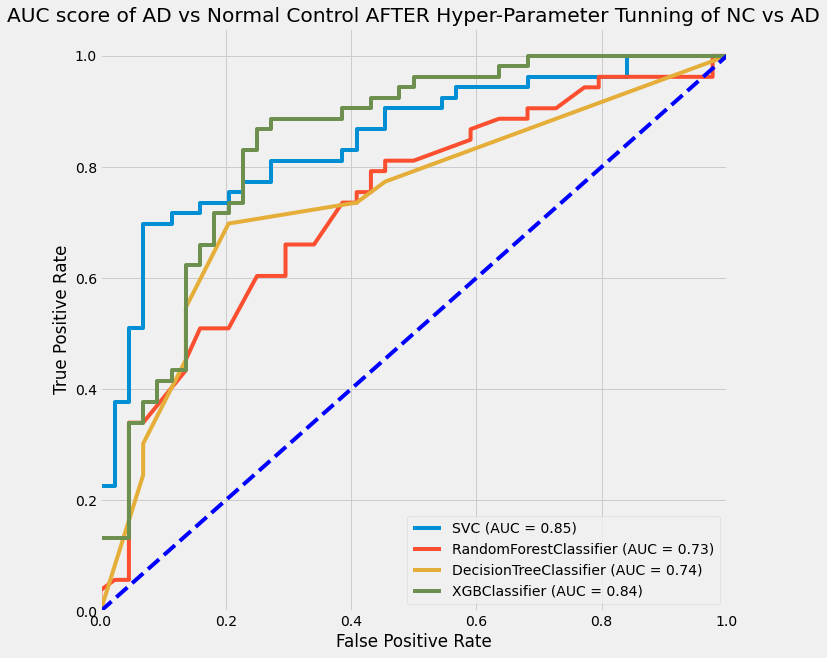

In [35]:
plt.style.use('fivethirtyeight')
# plotting Auc curve for Ad vs Normal control by using plot_roc_curve from sklearn libarary 
plt.figure(figsize=(10,10))    
ax = plt.gca()
# loop through classifiers and plot auc curve for each model
for i in finalClassifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control AFTER Hyper-Parameter Tunning of NC vs AD')



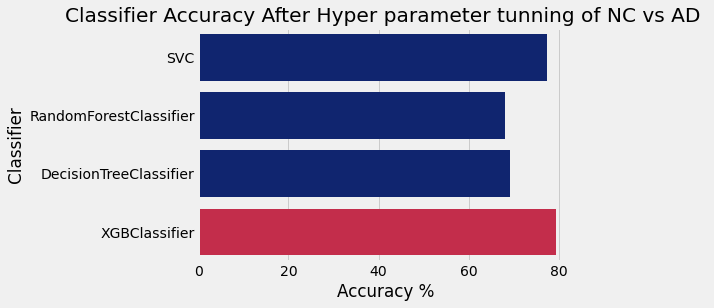

In [36]:
# bar plot for teh accuarcy of ecah classifiers
sns.set_color_codes("dark")
clrs=set_custom_palette(final['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifier', data=final, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy After Hyper parameter tunning of NC vs AD ')
plt.show()



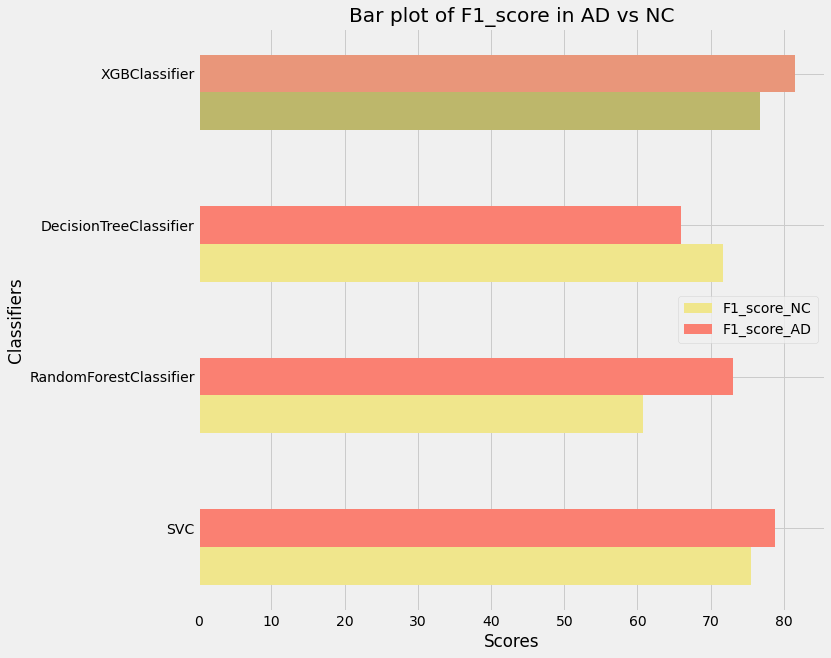

In [37]:

# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
f1_nc = final["F1_score_NC"]
f1_ad = final["F1_score_AD"]

# Using numpy to group 3 different data with bars
X = np.arange(len(f1_nc))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
# changing color to dark khaki if it has highest value for f-score-nc
clrs = ["khaki" if (x < max(f1_nc)) else 'darkkhaki' for x in f1_nc ]
plt.barh(X, f1_nc, color = clrs, height = 0.25)
# changing color to dark salmon if it has highest value for f-score-ad
clrs = ["salmon" if (x < max(f1_ad)) else 'darksalmon' for x in f1_ad]
plt.barh(X + 0.25, f1_ad, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['F1_score_NC', 'F1_score_AD'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of F1_score in AD vs NC")
# Namimg the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')

plt.show()

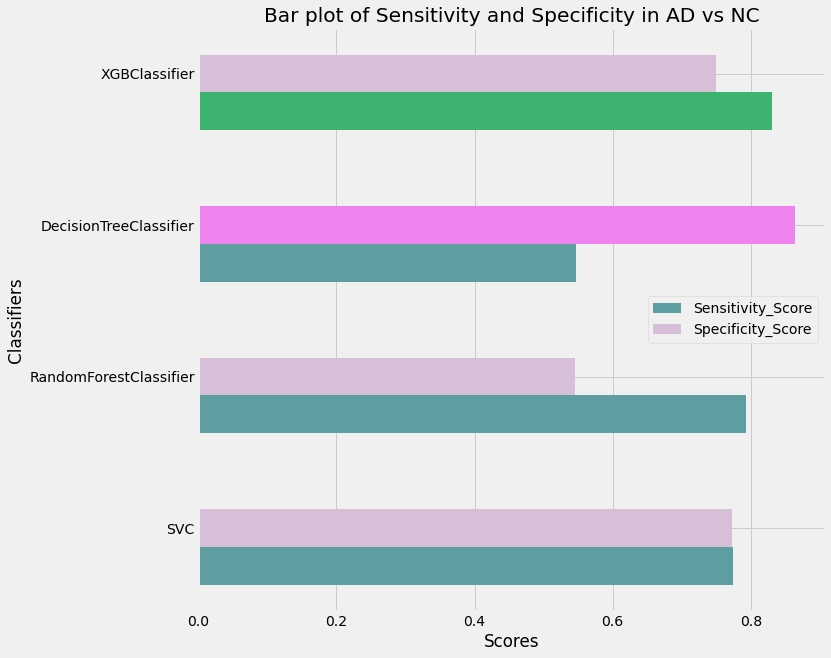

In [38]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = final["Sensitivity_Score"]
speci = final["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'violet' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in AD vs NC")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')

plt.show()

# MCI classifications

In [3]:
# correcting mistakes of not using replaced nan values 
combined_features_without_Scaling=np.concatenate((fa_feature_all_locations_without_Nan,md_feature_all_locations_without_Nan,rd_feature_all_locations_without_Nan, 
                        ad_feature_all_locations_without_Nan,cl_feature_all_locations_without_Nan,curvature_feature_all_locations_without_Nan,
                        Torsion_feature_all_locations_without_Nan,volume_feature_all_locations_without_Nan),axis=1)


In [4]:
# combining Features and train diagnose 
CombinedFeatDig=np.concatenate((combined_features_without_Scaling,train_diagnose),axis=1)

In [5]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [6]:
# Creating x and Y for each classes
NC_data_x = CombinedFeatDig[:,0:16000][NC]
NC_data_y = CombinedFeatDig[:,-1][NC]
print("-"*60)
print("Normal Control shape:",NC_data_x.shape)
print("Normal Control lable shape:",NC_data_y.shape)


NMCI_data_x =CombinedFeatDig[:,0:16000][NMCI]
NMCI_data_y = CombinedFeatDig[:,-1][NMCI]
print("-"*60)
print("NMCI shape:",NMCI_data_x.shape)
print("NMCI Y label:",NMCI_data_y.shape)

AD_data_x = CombinedFeatDig[:,0:16000][AD]
AD_data_y = CombinedFeatDig[:,-1][AD]
print("-"*60)
print("Alzheimer Disease shape :",AD_data_x.shape)
print("Alzheimer Disease Y label shape :",AD_data_y.shape)


------------------------------------------------------------
Normal Control shape: (235, 16000)
Normal Control lable shape: (235,)
------------------------------------------------------------
NMCI shape: (215, 16000)
NMCI Y label: (215,)
------------------------------------------------------------
Alzheimer Disease shape : (250, 16000)
Alzheimer Disease Y label shape : (250,)


#   Normal Control vs MCI 

In [8]:
# In order to perofm classification on NC and MCI these two data set are concatenated.
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 16000)
(450,)


In [9]:
where_1 = np.where(NCvsNMCI_Y== 1)
where_2 = np.where(NCvsNMCI_Y== 2)

# Assigning 0 to NCC and 1 to MCI .
NCvsNMCI_Y[where_1] = 0
NCvsNMCI_Y[where_2] = 1
NCvsNMCI_Y.shape

(450,)

In [10]:
from sklearn.model_selection import train_test_split
# splitting the above data into training,testing and validation sets
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X, NCvsNMCI_Y, test_size=0.20, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=123)

In [11]:
# looking at the shape of each sets.
print("Training Set shape:",X_train.shape)
print("Validation Set shape:",X_val.shape)
print("Test Set shape:",X_test.shape)


Training Set shape: (324, 16000)
Validation Set shape: (36, 16000)
Test Set shape: (90, 16000)


In [12]:
# peefoming MinMAx sacaler so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_val)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
scaler.fit(X_test)
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)

Alzheimer's diseas and Normal Train shape : (324, 16000)
Alzheimer's diseas and Normal Validation shape : (36, 16000)
Alzheimer's diseas and Normal Test shape : (90, 16000)


In [13]:

# intializing clasisfiers into teh classifier list.
classifiers = [
    SVC(random_state=25,probability=True),
    DecisionTreeClassifier(random_state=25),
    RandomForestClassifier(random_state=25),
    XGBClassifier(random_state=25),
    ]

# looking at teh tarning and validations core of four models before applying PCA
models_cols=["Classifiers", "Accuracy","F1_score_NM", "F1_score_NMCI"]
models_df = pd.DataFrame(columns=models_cols)

for models in classifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NM: {:.2%}".format(f1_scores1))
    print("F1_Score of NMCI: {:.2%}".format(f1_scores2))
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)


SVC
****Results****
Training 87.96%
Accuracy 47.78%
F1_Score of NM: 4.08%
F1_Score of NMCI: 64.12%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 41.11%
F1_Score of NM: 29.33%
F1_Score of NMCI: 49.52%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 51.11%
F1_Score of NM: 33.33%
F1_Score of NMCI: 61.40%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:33:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier
****Results****
Training 100.00%
Accuracy 56.67%
F1_Score of NM: 63.55%
F1_Score of NMCI: 46.58%


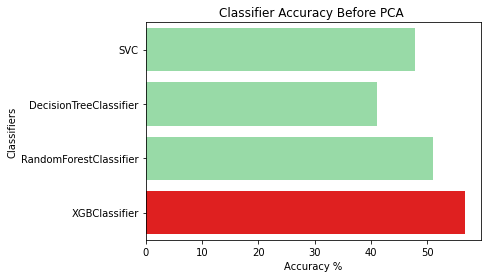

In [14]:
def set_custom_palette(series, max_color = 'crimson', other_color = 'b'):
    max_val = series.max()
    pal = []
    
    for item in series:
        if item == max_val:
            pal.append(max_color)
        else:
            pal.append(other_color)
    return pal
sns.set_color_codes("pastel")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'red', other_color = 'g')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="g",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy Before PCA ')
plt.show()

In [15]:
from math import sqrt
pca=PCA(150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
var_exp = pca.explained_variance_ratio_
X_val_pca=pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print("Total variance explianed by 250 components:", var_exp.sum())
print("std of test set AFTER PCA: ", np.std(X_test_pca))
print("mean of test set AFTER PCA: ",np.mean(X_test_pca))
print("std of training set AFTER PCA: ", np.std(X_train_pca))
print("mean of training set AFTER PCA: ",np.mean(X_train_pca))
print("std of test set BEFORE PCA:: ", np.std(X_test))
print("mean of test set BEFORE PCA: ",np.mean(X_test))
print("std of training set BEFORE PCA:: ", np.std(X_test))
print("mean of training set BEFORE PCA: ",np.mean(X_test))


Total variance explianed by 250 components: 0.8705085284756486
std of test set AFTER PCA:  2.3450039711831727
mean of test set AFTER PCA:  0.006813771643647773
std of training set AFTER PCA:  1.394124861666186
mean of training set AFTER PCA:  -2.6901206456760994e-17
std of test set BEFORE PCA::  0.3874429708155599
mean of test set BEFORE PCA:  0.43010262737748417
std of training set BEFORE PCA::  0.3874429708155599
mean of training set BEFORE PCA:  0.43010262737748417


In [16]:
from sklearn.preprocessing import MinMaxScaler

# Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
# scaler = MinMaxScaler()
scaler.fit(X_train_pca)
X_train_pca=scaler.transform(X_train_pca)
scaler.fit(X_val_pca)
X_val_pca=scaler.transform(X_val_pca)
X_test_pca=scaler.transform(X_test_pca)
scaler.fit(X_test_pca)
# print("Alzheimer's diseas and Normal Train shape :",X_train_pca.shape)
# print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
# print("Alzheimer's diseas and Normal Test shape :",X_test.shape)
print("Std of test set : ", np.std(X_test_pca))
print("Mean of test set: ",np.mean(X_test_pca))
print("Std of training set : ", np.std(X_train_pca))
print("Mean of training set: ",np.mean(X_train_pca))

Std of test set :  0.42201471494038467
Mean of test set:  0.485969662643901
Std of training set :  0.16720530296723374
Mean of training set:  0.45639537605018526


In [17]:
# comparing the perfrmance of the models after perfroming PCA.

models_cols=["Classifiers", "Accuracy","F1_score_NM", "F1_score_NMCI","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)

for models in classifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of MCI: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)


SVC
****Results****
Training 97.53%
Accuracy 55.56%
F1_Score of NC: 33.33%
F1_Score of MCI: 66.67%
Sensitivity Score: 90.91%
Specificity Score: 21.74%
AUC Score: 61.14%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 50.00%
F1_Score of NC: 51.61%
F1_Score of MCI: 48.28%
Sensitivity Score: 47.73%
Specificity Score: 52.17%
AUC Score: 49.95%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 50.00%
F1_Score of NC: 44.44%
F1_Score of MCI: 54.55%
Sensitivity Score: 61.36%
Specificity Score: 39.13%
AUC Score: 53.85%
[23:33:55] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 54.44%
F1_Score of NC: 56.84%
F1_Score of MCI: 51.76%
Sensitivity Score: 50.00%
Specificity Score: 58.70%
AUC Score: 52.92%


Text(0.5, 1.0, 'AUC score of AD vs Normal Control AFTER PCA of NC vs MCI.')

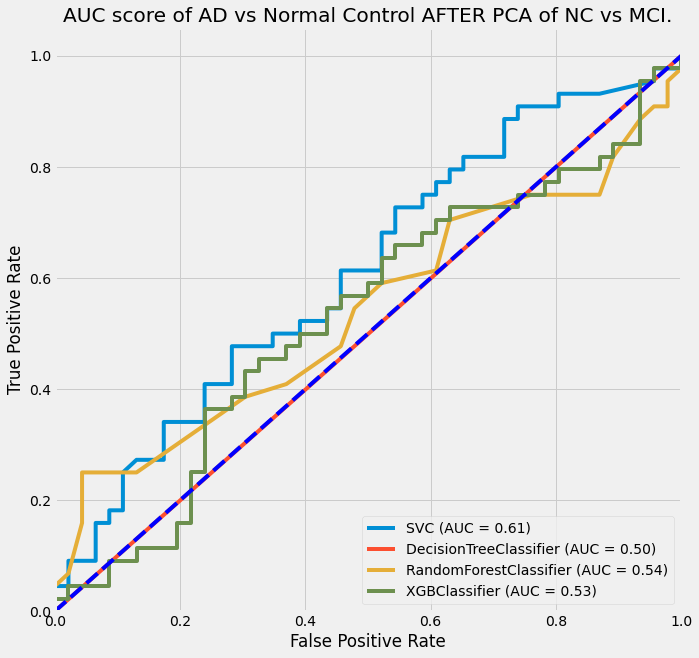

In [18]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs Normal Control AFTER PCA of NC vs MCI.')

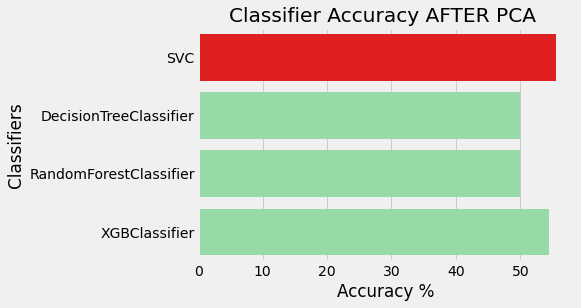

In [19]:
# plotting the above results.
sns.set_color_codes("pastel")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'red', other_color = 'g')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="g",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy AFTER PCA ')
plt.show()

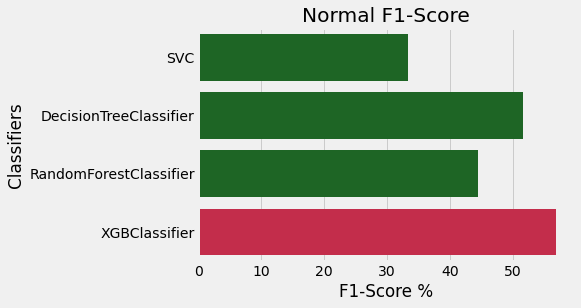

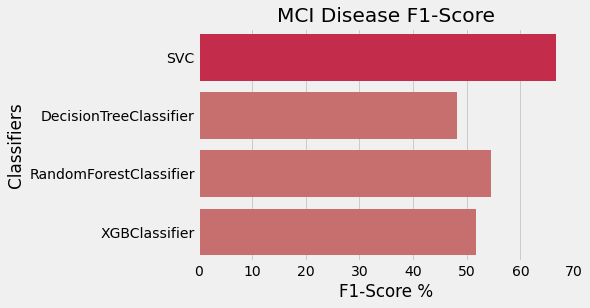

In [20]:
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NM'],other_color = 'g')
sns.barplot(x='F1_score_NM', y='Classifiers', data=models_df,palette=clrs, color="g")

plt.xlabel('F1-Score %')
plt.title('Normal F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_NMCI'],other_color = 'r')
sns.barplot(x='F1_score_NMCI', y='Classifiers', data=models_df,palette=clrs, color="r")

plt.xlabel('F1-Score %')
plt.title('MCI Disease F1-Score')
plt.show()

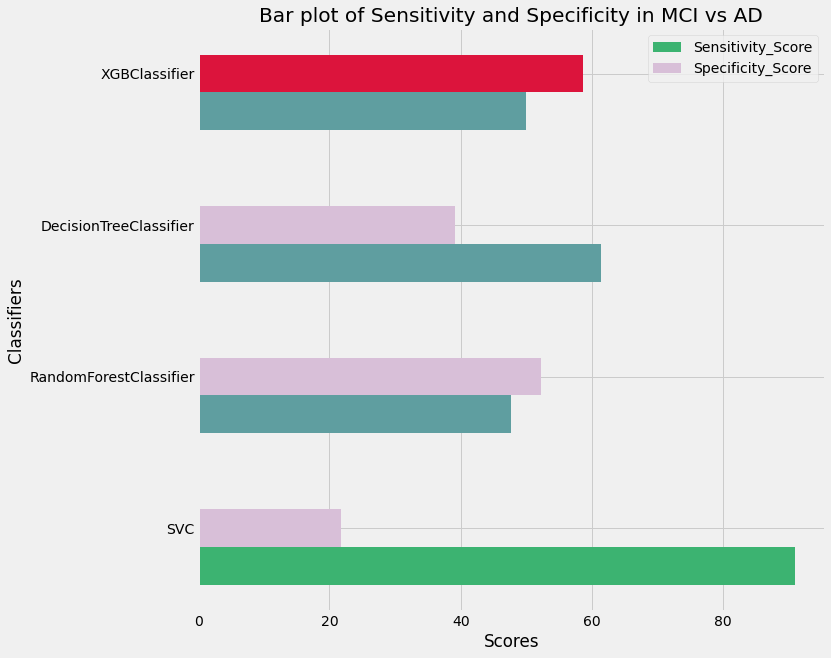

In [21]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = models_df["Sensitivity_Score"]
speci = models_df["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'crimson' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in MCI vs AD")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

# Normal Control vs NMCI HYPERPARAMTER TUNNING


## SVM HYPERPARAMTER TUNNING

In [22]:
%%time


# SVm hyperparameter tunning by trying difefrent values.
cross_valid_scores = {}
best_estimator_Score={}
parameters = {
    "C": [0.001, 0.01, 0.1,1,1.5 ,2, 2.4,3,4],
    "kernel": ["linear", "poly", "sigmoid","rbf"],
    "gamma": ["scale", "auto"],
     "class_weight":["balanced",None],
    "probability":[True,False]
}
# parameters = {
#     "C": [0.001, 0.01, 0.1,1,1.5 2, 2.4,3,4],
#     "kernel": ["linear", "poly", "rbf", "sigmoid"],
#     "gamma": ["scale", "auto"],
# }

model_svc = SVC(
    random_state=25,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_svc.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_svc.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_svc.best_estimator_.score(X_val_pca, y_val)
print('-----')

-----
Best parameters {'C': 1, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly', 'probability': True}
Mean cross-validated accuracy score of the best_estimator: 0.593
Best estimator score on Validation set : 0.556
-----
CPU times: user 1min 2s, sys: 221 ms, total: 1min 2s
Wall time: 1min 2s


## Desicion Tree HYPERPARAMTER TUNNING

In [23]:
%%time
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
                      
}


model_desicion_tree = DecisionTreeClassifier(
    random_state=25
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_

# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_desicion_tree.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_desicion_tree.best_estimator_.score(X_val_pca, y_val)

print('-----')

-----
Best parameters {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.565
Best estimator score on Validation set : 0.583
-----
CPU times: user 2min 7s, sys: 377 ms, total: 2min 7s
Wall time: 2min 8s


#  Random Forest HYPERPARAMTERER TUNNING

In [24]:
%%time


parameters = {
    "criterion":["gini","entropy"],
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_features":range(5,11),
    "bootstrap":[True,False],
    "class_weight":["balanced",None],
    "max_depth": [3, 5, 7, 9, 11, 13,None],
    
}



model_random_forest = RandomForestClassifier(
    random_state=25,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_random_forest.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_random_forest.best_estimator_.score(X_val_pca, y_val)

print('-----')


-----
Best parameters {'bootstrap': False, 'class_weight': None, 'criterion': 'entropy', 'max_depth': 7, 'max_features': 7, 'n_estimators': 20}
Mean cross-validated accuracy score of the best_estimator: 0.636
Best estimator score on Validation set : 0.611
-----
CPU times: user 4min 51s, sys: 2.91 s, total: 4min 54s
Wall time: 4min 56s


#  XGBOOST HYPERPARAMETER TUNNING

In [25]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'verbosity': [0]
}

model_xgb = XGBClassifier(
    random_state=25,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
     # add this line to slient warning message
)

model_xgb.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_xgb.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_xgb.best_estimator_.score(X_val_pca, y_val)

print('-----')


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----
Best parameters {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 50, 'verbosity': 0}
Mean cross-validated accuracy score of the best_estimator: 0.593
Best estimator score on Validation set : 0.611
-----
CPU times: user 4min 7s, sys: 4.58 s, total: 4min 11s
Wall time: 35.9 s


In [26]:
pd.DataFrame(cross_valid_scores, index=['Best Accuracy Through Grid Search']).T

,Best Accuracy Through Grid Search
svc,0.592644
desicion_tree,0.564760
random_forest,0.635673
xgboost,0.592548


## Applying Best Paramaters for each models after Hyper Paramater tunning.

In [27]:
# combining Training and validation set which makes training set 80% and  test set 20%
X_train_pca=np.concatenate((X_val_pca, X_train_pca), axis=0)
y_train=np.concatenate((y_val, y_train), axis=0)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)

(360, 150)
(360,)
(90, 150)


In [28]:
# Applying Best Paramaters for each models after Hyper Paramater tunning

# applying the ebst aprameters of hyper_parameter tunning into four classifiers of sVM, decision tree and random Forest
svc_final = SVC(**model_svc.best_params_)

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(
            **model_random_forest.best_params_,random_state=25
)


# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_,random_state=25
)

# Applying best params to final xgboost
xgb_final = XGBClassifier(
        **model_xgb.best_params_,random_state=25)


# saving teh mdoel to be used for feature importance
from pickle import dump
# save the svc model
dump(svc_final, open('svc_final_NCvsMCI_withVal.pkl', 'wb'))
# save the  randomforest
dump(rf_final, open('rf_final_NCvsMCI_withVal.pkl', 'wb'))

# save the dt model
dump(dt_final, open('dt_final_NCvsMCI_withVal.pkl', 'wb'))
# save the axgboost model
dump(xgb_final, open('xgb_final_NCvsMCI_withVal.pkl', 'wb'))





In [29]:
# comapring the metrics after trying the best parameters for each classifiers.

finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
final_cols=["Classifier", "Accuracy","F1_score_NC", "F1_score_NMCI","Sensitivity_Score","Specificity_Score","AUC"]
final = pd.DataFrame(columns=final_cols)

for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
    
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)
  
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of MCI: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))

    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=final_cols)
    final = final.append(final_entry )
print("="*30)

SVC
****Results****
Training 100.00%
Accuracy 51.11%
F1_Score of NC: 46.34%
F1_Score of MCI: 55.10%
Sensitivity Score: 61.36%
Specificity Score: 41.30%
AUC Score: 52.72%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 55.56%
F1_Score of NC: 48.72%
F1_Score of MCI: 60.78%
Sensitivity Score: 70.45%
Specificity Score: 41.30%
AUC Score: 58.84%
DecisionTreeClassifier
****Results****
Training 67.78%
Accuracy 58.89%
F1_Score of NC: 66.67%
F1_Score of MCI: 46.38%
Sensitivity Score: 36.36%
Specificity Score: 80.43%
AUC Score: 60.52%
XGBClassifier
****Results****
Training 99.72%
Accuracy 62.22%
F1_Score of NC: 59.52%
F1_Score of MCI: 64.58%
Sensitivity Score: 70.45%
Specificity Score: 54.35%
AUC Score: 62.60%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [30]:
final

,Classifier,Accuracy,F1_score_NC,F1_score_NMCI,Sensitivity_Score,Specificity_Score,AUC
0,SVC,51.111111,46.341463,55.102041,61.363636,41.304348,52.717391
0,RandomForestClassifier,55.555556,48.717949,60.784314,70.454545,41.304348,58.843874
0,DecisionTreeClassifier,58.888889,66.666667,46.376812,36.363636,80.434783,60.523715
0,XGBClassifier,62.222222,59.523810,64.583333,70.454545,54.347826,62.598814


In [31]:
models_df


,Classifiers,Accuracy,F1_score_NM,F1_score_NMCI,Sensitivity_Score,Specificity_Score,AUC
0,SVC,55.555556,33.333333,66.666667,90.909091,21.739130,61.141304
0,DecisionTreeClassifier,50.000000,51.612903,48.275862,47.727273,52.173913,49.950593
0,RandomForestClassifier,50.000000,44.444444,54.545455,61.363636,39.130435,53.853755
0,XGBClassifier,54.444444,56.842105,51.764706,50.000000,58.695652,52.915020


Text(0.5, 1.0, 'AUC score of Normal Control vs MCI "AFTER" Hyper-Parameter Tunning.')

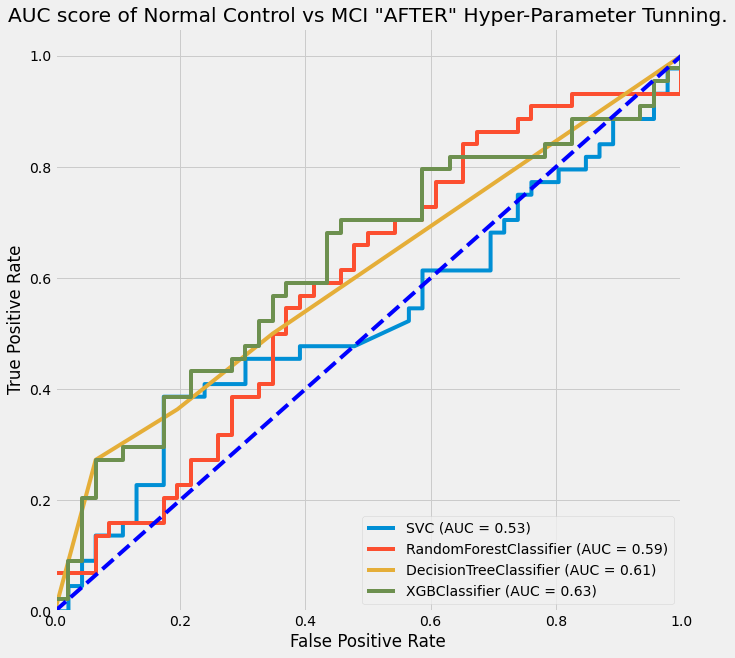

In [32]:
# plotting AUC curvee 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in finalClassifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of Normal Control vs MCI "AFTER" Hyper-Parameter Tunning.')



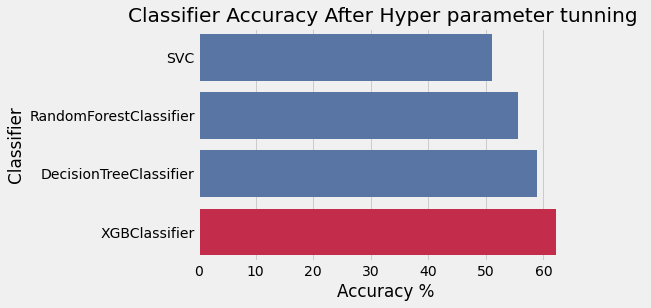

In [33]:

# plotting the accuarcy score of different models

sns.set_color_codes("deep")
clrs=set_custom_palette(final['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifier', data=final, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy After Hyper parameter tunning ')
plt.show()



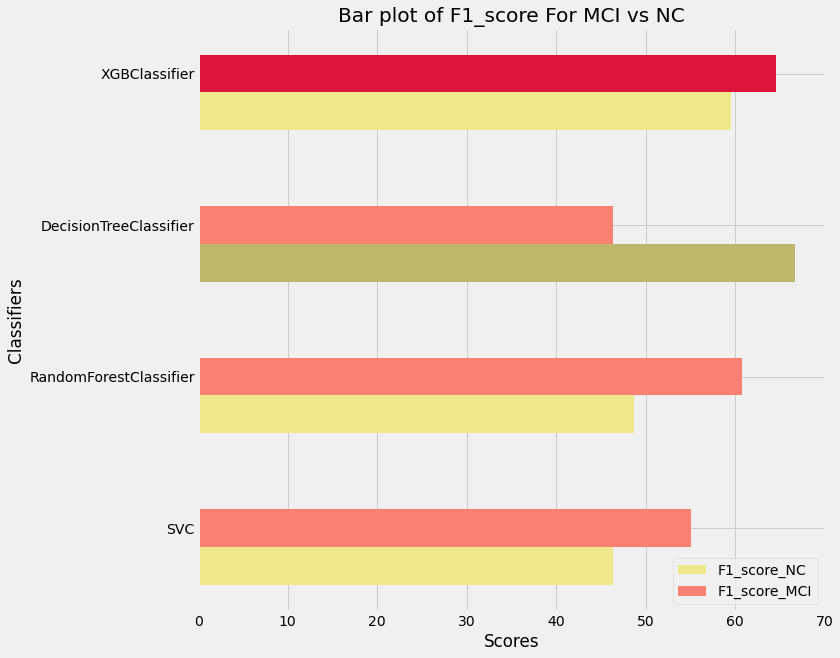

In [34]:

# plotting the f1_Scores for each classifiers 
plt.figure(figsize=[10, 10])
# Data to be plotted
f1_nc = final["F1_score_NC"]
f1_mci = final["F1_score_NMCI"]

# Using numpy to group 3 different data with bars
X = np.arange(len(f1_nc))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
# changing color to dark khaki if it has highest value for f-score-nc
clrs = ["khaki" if (x < max(f1_nc)) else 'darkkhaki' for x in f1_nc ]
plt.barh(X, f1_nc, color = clrs, height = 0.25)
# changing color to dark salmon if it has highest value for f-score-ad
clrs = ["salmon" if (x < max(f1_mci)) else 'crimson' for x in f1_mci]
plt.barh(X + 0.25, f1_mci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['F1_score_NC', 'F1_score_MCI'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of F1_score For MCI vs NC")
# Namimg the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
plt.show()

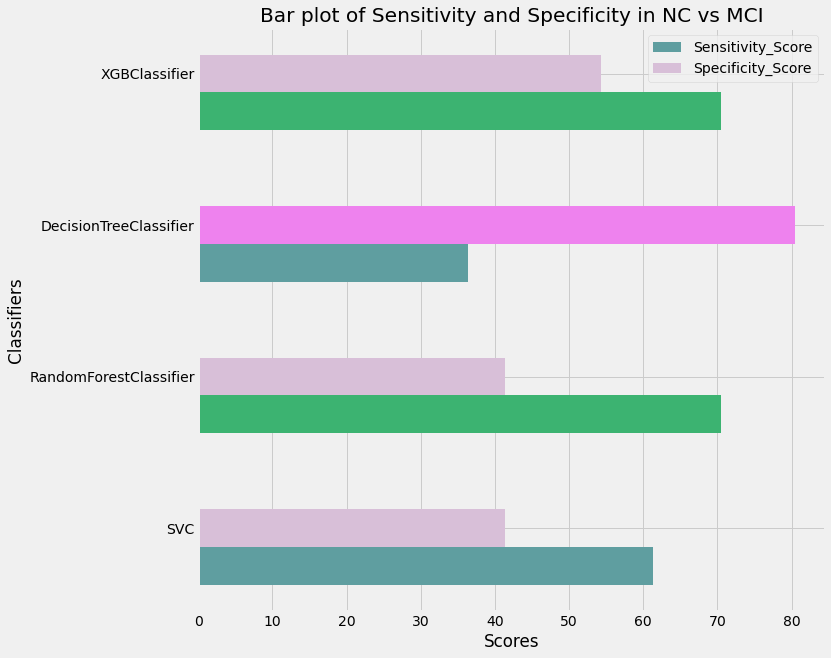

In [35]:
# plotting the sensivity and specificity of different classifiers
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = final["Sensitivity_Score"]
speci = final["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'violet' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in NC vs MCI")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

# AD Vs MCI 

In [36]:
# concatenating Ad and MCI to perform classification
ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 16000)
(465,)


In [37]:
# assaigning 1 to MCI and 0 to Ad to classify MCI from AD
where_2 = np.where(ADvsNMCI_Y== 2)
where_3 = np.where(ADvsNMCI_Y== 3)

ADvsNMCI_Y[where_2] = 1
ADvsNMCI_Y[where_3] = 0
ADvsNMCI_Y.shape

(465,)

In [38]:
from sklearn.model_selection import train_test_split
# splitting teh adta into val, test and trainings sets
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X, ADvsNMCI_Y, test_size=0.20, random_state=123)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.10, random_state=123)

print("Training Set shape:",X_train.shape)
print("Validation Set shape:",X_val.shape)
print("Test Set shape:",X_test.shape)

Training Set shape: (334, 16000)
Validation Set shape: (38, 16000)
Test Set shape: (93, 16000)


In [39]:
# using MinMAx scaler so that all features be on the same sclae
scaler = MinMaxScaler(feature_range = (0, 1))
scaler.fit(X_train)
X_train=scaler.transform(X_train)
scaler.fit(X_val)
X_val=scaler.transform(X_val)
X_test=scaler.transform(X_test)
scaler.fit(X_test)
print("Alzheimer's diseas and Normal Train shape :",X_train.shape)
print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
print("Alzheimer's diseas and Normal Test shape :",X_test.shape)

Alzheimer's diseas and Normal Train shape : (334, 16000)
Alzheimer's diseas and Normal Validation shape : (38, 16000)
Alzheimer's diseas and Normal Test shape : (93, 16000)


In [40]:
# applying classfiers of svm , decision tree, random froest and XGboost with their default parameters
classifiers = [
    SVC(random_state=25 ,probability=True),
    DecisionTreeClassifier(random_state=25),
    RandomForestClassifier(random_state=25),
    XGBClassifier(random_state=25),
    ]

In [41]:
%%time

models_cols=["Classifiers", "Accuracy","F1_score_NMCI", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)
# creating for loop  models be fitted and metrics computed for each mdoels
for models in classifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of MCI: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
#     saving teh rseult in models_Df data frame.
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)



SVC
****Results****
Training 89.52%
Accuracy 51.61%
F1_Score of MCI: 0.00%
F1_Score of AD: 68.09%
Sensitivity Score: 0.00%
Specificity Score: 100.00%
AUC Score: 70.28%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 46.24%
F1_Score of MCI: 58.33%
F1_Score of AD: 24.24%
Sensitivity Score: 77.78%
Specificity Score: 16.67%
AUC Score: 47.22%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 54.84%
F1_Score of MCI: 56.25%
F1_Score of AD: 53.33%
Sensitivity Score: 60.00%
Specificity Score: 50.00%
AUC Score: 57.85%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of MCI: 64.35%
F1_Score of AD: 42.25%
Sensitivity Score: 82.22%
Specificity Score: 31.25%
AUC Score: 58.89%
CPU times: user 1min 23s, sys: 1.98 s, total: 1min 25s
Wall time: 28 s


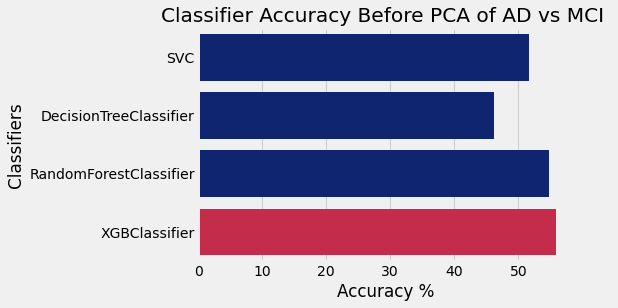

In [42]:


# comapringa accuarcy of each models before applying PCA
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy Before PCA of AD vs MCI ')
plt.show()



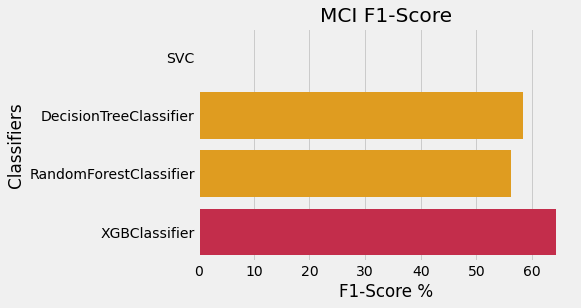

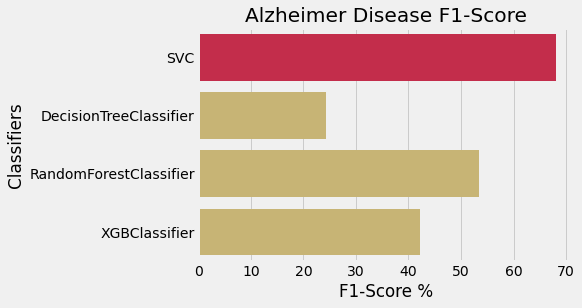

In [43]:

# comapringa f1_Score of each models before applying PCA
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NMCI'],max_color = 'crimson', other_color = 'orange')
sns.barplot(x='F1_score_NMCI', y='Classifiers', data=models_df,palette=clrs, color="orange")

plt.xlabel('F1-Score %')
plt.title('MCI F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],max_color = 'crimson', other_color = 'y')
sns.barplot(x='F1_score_AD', y='Classifiers', data=models_df,palette=clrs, color="y")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()

In [44]:
from math import sqrt
pca=PCA(150)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
var_exp = pca.explained_variance_ratio_
X_val_pca=pca.transform(X_val)
X_test_pca = pca.transform(X_test)
print("Total variance explianed by 250 components:", var_exp.sum())
print("std of test set AFTER PCA: ", np.std(X_test_pca))
print("mean of test set AFTER PCA: ",np.mean(X_test_pca))
print("std of training set AFTER PCA: ", np.std(X_train_pca))
print("mean of training set AFTER PCA: ",np.mean(X_train_pca))
print("std of test set BEFORE PCA:: ", np.std(X_test))
print("mean of test set BEFORE PCA: ",np.mean(X_test))
print("std of training set BEFORE PCA:: ", np.std(X_test))
print("mean of training set BEFORE PCA: ",np.mean(X_test))


Total variance explianed by 250 components: 0.8701996954036605
std of test set AFTER PCA:  2.610363214221594
mean of test set AFTER PCA:  0.02758704851149702
std of training set AFTER PCA:  1.3634419845036587
mean of training set AFTER PCA:  -3.4888924749897136e-17
std of test set BEFORE PCA::  0.4075818875940613
mean of test set BEFORE PCA:  0.4280622275796875
std of training set BEFORE PCA::  0.4075818875940613
mean of training set BEFORE PCA:  0.4280622275796875


In [45]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# # Aplying Scaling so that all features be on the same scale.
scaler = MinMaxScaler(feature_range = (0, 1))
# scaler = MinMaxScaler()
scaler.fit(X_train_pca)
X_train_pca=scaler.transform(X_train_pca)
scaler.fit(X_val_pca)
X_val_pca=scaler.transform(X_val_pca)
X_test_pca=scaler.transform(X_test_pca)
scaler.fit(X_test_pca)
# print("Alzheimer's diseas and Normal Train shape :",X_train_pca.shape)
# print("Alzheimer's diseas and Normal Validation shape :",X_val.shape)
# print("Alzheimer's diseas and Normal Test shape :",X_test.shape)
print("Std of test set : ", np.std(X_test_pca))
print("Mean of test set: ",np.mean(X_test_pca))
print("Std of training set : ", np.std(X_train_pca))
print("Mean of training set: ",np.mean(X_train_pca))

Std of test set :  0.47120504171757555
Mean of test set:  0.49775590745252424
Std of training set :  0.16824315466117054
Mean of training set:  0.4621330762448388


In [48]:
%%time
# creating df sao that all result will be saved in data frame and be comapred later on.
models_cols=["Classifiers", "Accuracy","F1_score_NMCI", "F1_score_AD","Sensitivity_Score","Specificity_Score","AUC"]
models_df = pd.DataFrame(columns=models_cols)
# creating for loop  models be fitted and metrics computed for each mdoels
for models in classifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train)
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
    #     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
#     predict probability for computing AUC
    predic = models.predict_proba(X_test)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)

    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of MCI: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
#     saving teh rseult in models_Df data frame.
    models_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=models_cols)
    models_df = models_df.append(models_entry)
    
    
    
print("="*30)



SVC
****Results****
Training 89.52%
Accuracy 51.61%
F1_Score of MCI: 0.00%
F1_Score of AD: 68.09%
Sensitivity Score: 0.00%
Specificity Score: 100.00%
AUC Score: 70.28%
DecisionTreeClassifier
****Results****
Training 100.00%
Accuracy 46.24%
F1_Score of MCI: 58.33%
F1_Score of AD: 24.24%
Sensitivity Score: 77.78%
Specificity Score: 16.67%
AUC Score: 47.22%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 54.84%
F1_Score of MCI: 56.25%
F1_Score of AD: 53.33%
Sensitivity Score: 60.00%
Specificity Score: 50.00%
AUC Score: 57.85%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of MCI: 64.35%
F1_Score of AD: 42.25%
Sensitivity Score: 82.22%
Specificity Score: 31.25%
AUC Score: 58.89%
CPU times: user 1min 23s, sys: 2.13 s, total: 1min 25s
Wall time: 28.8 s


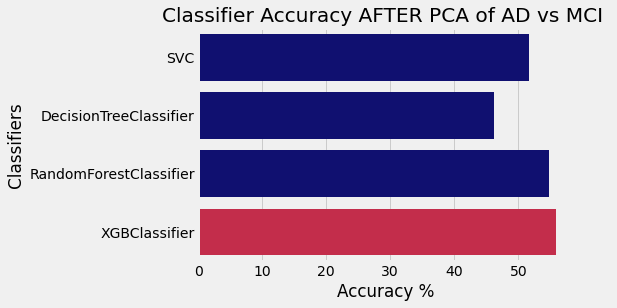

In [49]:
# comparing accuracy of each models after PCA
sns.set_color_codes("pastel")
clrs=set_custom_palette(models_df['Accuracy'],max_color = 'crimson', other_color = 'navy')
sns.barplot(x='Accuracy', y='Classifiers', data=models_df, palette=clrs,color="navy",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy AFTER PCA of AD vs MCI ')
plt.show()

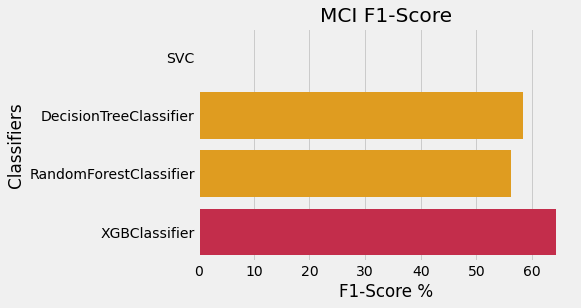

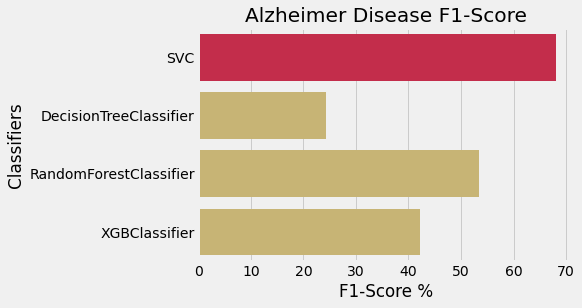

In [50]:
# comapringa f1_Score of each models before applying PCA
sns.set_color_codes("dark")
clrs=set_custom_palette(models_df['F1_score_NMCI'],max_color = 'crimson', other_color = 'orange')
sns.barplot(x='F1_score_NMCI', y='Classifiers', data=models_df,palette=clrs, color="orange")

plt.xlabel('F1-Score %')
plt.title('MCI F1-Score')
plt.show()

sns.set_color_codes("muted")
clrs=set_custom_palette(models_df['F1_score_AD'],max_color = 'crimson', other_color = 'y')
sns.barplot(x='F1_score_AD', y='Classifiers', data=models_df,palette=clrs, color="y")

plt.xlabel('F1-Score %')
plt.title('Alzheimer Disease F1-Score')
plt.show()

Text(0.5, 1.0, 'AUC score of AD vs MCI AFTER PCA of AD vs MCI.')

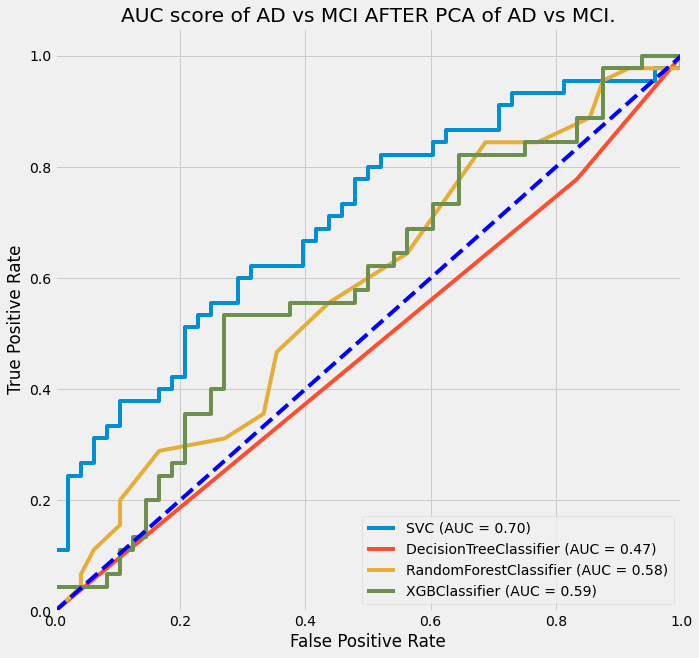

In [51]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in classifiers:
    plot_roc_curve(i, X_test, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs MCI AFTER PCA of AD vs MCI.')

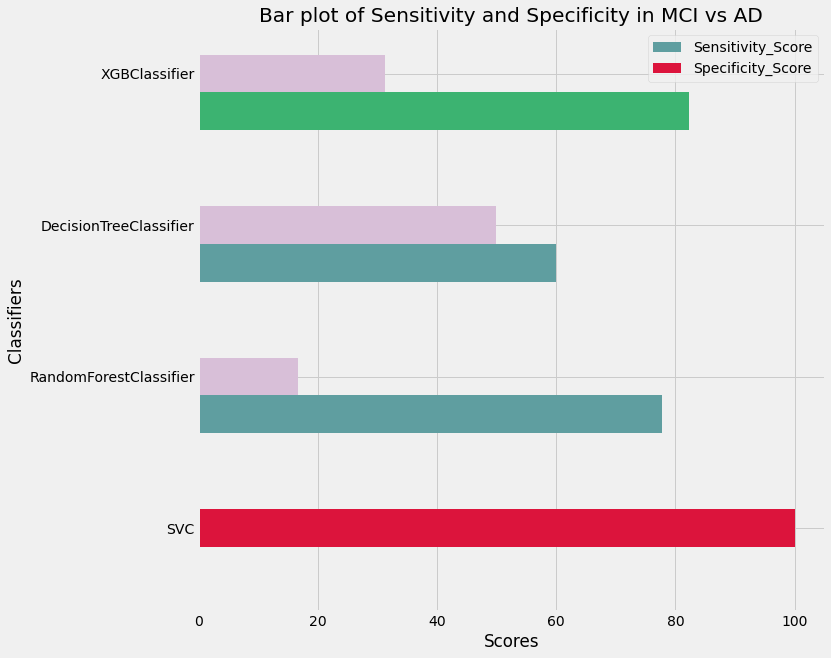

In [52]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = models_df["Sensitivity_Score"]
speci = models_df["Specificity_Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'crimson' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in MCI vs AD")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

# AD vs MCI HYPERPARAMTER TUNNING


## SVM HYPERPARAMTER TUNNING

In [53]:
%%time


# HYPERPARAMTER TUNNING svm with diffreent values.
cross_valid_scores = {}
best_estimator_Score={}
parameters = {
    "C": [0.001, 0.01, 0.1, 1.0,1.4,1.5,2.0,2.4,3.0,4],
    "kernel": ["linear", "poly", "sigmoid","rbf"],
    "gamma": ["scale", "auto"],
    "class_weight":["balanced",None],
    "probability":[True,False]
}


model_svc = SVC(
    random_state=25,
    class_weight="balanced",
    probability=True,
)

model_svc = GridSearchCV(
    model_svc, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_svc.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_svc.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_svc.best_score_:.3f}'
)
cross_valid_scores['svc'] = model_svc.best_score_


# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_svc.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['SVM Model']=model_svc.best_estimator_.score(X_val_pca, y_val)

print('-----')


-----
Best parameters {'C': 3.0, 'class_weight': None, 'gamma': 'scale', 'kernel': 'rbf', 'probability': True}
Mean cross-validated accuracy score of the best_estimator: 0.650
Best estimator score on Validation set : 0.737
-----
CPU times: user 1min 10s, sys: 171 ms, total: 1min 10s
Wall time: 1min 10s


## Desicion Tree HYPERPARAMTER TUNNING

In [54]:
%%time
parameters = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,20),
    "min_samples_split":range(2,10),
    "min_samples_leaf":range(1,5)
                      
}

model_desicion_tree = DecisionTreeClassifier(
    random_state=25
)

model_desicion_tree = GridSearchCV(
    model_desicion_tree, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_desicion_tree.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_desicion_tree.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + \
    f'{model_desicion_tree.best_score_:.3f}'
)
cross_valid_scores['desicion_tree'] = model_desicion_tree.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_desicion_tree.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['Desicion_tree']=model_desicion_tree.best_estimator_.score(X_val_pca, y_val)


print('-----')

-----
Best parameters {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 2}
Mean cross-validated accuracy score of the best_estimator: 0.620
Best estimator score on Validation set : 0.526
-----
CPU times: user 1min 53s, sys: 413 ms, total: 1min 53s
Wall time: 1min 53s


#  Random Forest HYPERPARAMTERER TUNNING

In [55]:
%%time
parameters = {
    "n_estimators": [5, 10, 15, 20, 25], 
    "max_features":range(5,11),
    "bootstrap":[True,False],
    "max_depth": [3, 5, 7, 9, 11, 13],
    
}


model_random_forest = RandomForestClassifier(
    random_state=25,
    class_weight='balanced',
)

model_random_forest = GridSearchCV(
    model_random_forest, 
    parameters, 
    cv=5,
    scoring='accuracy',
)

model_random_forest.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_random_forest.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: '+ \
    f'{model_random_forest.best_score_:.3f}'
)
cross_valid_scores['random_forest'] = model_random_forest.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_random_forest.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['Random_Forest']=model_random_forest.best_estimator_.score(X_val_pca, y_val)


print('-----')

-----
Best parameters {'bootstrap': False, 'max_depth': 13, 'max_features': 8, 'n_estimators': 25}
Mean cross-validated accuracy score of the best_estimator: 0.638
Best estimator score on Validation set : 0.474
-----
CPU times: user 57.2 s, sys: 524 ms, total: 57.7 s
Wall time: 58 s


#  XGBOOST HYPERPARAMETER TUNNING

In [56]:
%%time
parameters = {
    'max_depth': [3, 5, 7, 9], 
    'n_estimators': [5, 10, 15, 20, 25, 50, 100],
    'learning_rate': [0.01, 0.05, 0.1],
    'verbosity': [0]
}

model_xgb = XGBClassifier(
    random_state=25,
)

model_xgb = GridSearchCV(
    model_xgb, 
    parameters, 
    cv=5,
    scoring='accuracy',
     # add this line to slient warning message
)

model_xgb.fit(X_train_pca, y_train.ravel())

print('-----')
print(f'Best parameters {model_xgb.best_params_}')
print(
    f'Mean cross-validated accuracy score of the best_estimator: ' + 
    f'{model_xgb.best_score_:.3f}'
)
cross_valid_scores['xgboost'] = model_xgb.best_score_
# using validation set to test the best estimator
print('Best estimator score on Validation set : %.3f'%model_xgb.best_estimator_.score(X_val_pca, y_val))

best_estimator_Score['XG-Boost Model']=model_xgb.best_estimator_.score(X_val_pca, y_val)

print('-----')

/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


-----
Best parameters {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 25, 'verbosity': 0}
Mean cross-validated accuracy score of the best_estimator: 0.635
Best estimator score on Validation set : 0.500
-----
CPU times: user 4min 29s, sys: 6.02 s, total: 4min 35s
Wall time: 39.3 s


In [57]:
pd.DataFrame(cross_valid_scores, index=['Best Accuracy Through Grid Search ']).T

,Best Accuracy Through Grid Search
svc,0.649525
desicion_tree,0.619946
random_forest,0.637901
xgboost,0.634690


## Applying Best Paramaters for each models after Hyper Paramater tunning.

In [58]:
# combining Training and validation set which makes training set 80% and  test set 20%
X_train_pca=np.concatenate((X_val_pca, X_train_pca), axis=0)
y_train=np.concatenate((y_val, y_train), axis=0)
print(X_train_pca.shape)
print(y_train.shape)
print(X_test_pca.shape)

(372, 150)
(372,)
(93, 150)


In [63]:
#  Applying best params to final SVC.
svc_final = classifiers[0]

# Applying best params to final Random Forest
rf_final = RandomForestClassifier(random_state=25)



# Applying best params to final decision tree
dt_final = DecisionTreeClassifier(
            **model_desicion_tree.best_params_,random_state=25
)

# Applying best params to final xgboost
xgb_final = XGBClassifier(random_state=25)



# saving teh mdoel to be used for feature importance
from pickle import dump
# save the svc model
dump(svc_final, open('svc_final_ADvsMCI_withVal.pkl', 'wb'))
# save the  randomforest
dump(rf_final, open('rf_final_ADvsMCI_withVal.pkl', 'wb'))

# save the dt model
dump(dt_final, open('dt_final_ADvsMCI_withVal.pkl', 'wb'))
# save the axgboost model
dump(xgb_final, open('xgb_final_ADvsMCI_withVal.pkl', 'wb'))

In [65]:



from sklearn.metrics import f1_score, confusion_matrix
finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
final_cols=["Classifier", "Accuracy","F1_score_NMCI", "F1_score_AD","Sensitivity_Score","Specificity Score","AUC"]
final = pd.DataFrame(columns=final_cols)
for models in finalClassifiers:
    models.fit(X_train_pca, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test_pca)
    trainingscore=models.score(X_train_pca, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    f1_scores1 = f1_score(y_test.ravel(), train_predictions,pos_label=1)
    f1_scores2 = f1_score(y_test.ravel(), train_predictions,pos_label=0)
#     computing sensitivity,specificity from consuion matrix
    confusion=confusion_matrix(y_test.ravel(), train_predictions)
#     getting TN from row 0 and column 0
    TN = confusion[0][0]
#     getting FN from row 1 and column 0
    FN = confusion[1][0]
#     getting TP from row 1 and column 1
    TP = confusion[1][1]
#     getting FP from row 0 and column 1
    FP = confusion[0][1]
#    sensitivity computed from TP divided by (False negative + True postive) 
    sens=TP/(FN+TP)
#     specificity computed from TN divided by(True neagtive + False postive)
    spec=TN/(TN+FP)
    predic = models.predict_proba(X_test_pca)[:, 1]

#     AUC Score
    auc = roc_auc_score(y_test.ravel(), predic)
    
  
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    print("F1_Score of NC: {:.2%}".format(f1_scores1))
    print("F1_Score of AD: {:.2%}".format(f1_scores2))
    print("Sensitivity Score: {:.2%}".format(sens))
    print("Specificity Score: {:.2%}".format(spec))
    print("AUC Score: {:.2%}".format(auc))
# saving the result into final model data frame.
    final_entry = pd.DataFrame([[name, accuracy*100,f1_scores1*100, f1_scores2*100,sens*100,spec*100,auc*100]], columns=final_cols)
    final = final.append(final_entry )
print("="*30)


final

SVC
****Results****
Training 98.12%
Accuracy 59.14%
F1_Score of NC: 50.00%
F1_Score of AD: 65.45%
Sensitivity Score: 42.22%
Specificity Score: 75.00%
AUC Score: 60.65%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of NC: 54.95%
F1_Score of AD: 56.84%
Sensitivity Score: 55.56%
Specificity Score: 56.25%
AUC Score: 55.35%
DecisionTreeClassifier
****Results****
Training 73.12%
Accuracy 47.31%
F1_Score of NC: 42.35%
F1_Score of AD: 51.49%
Sensitivity Score: 40.00%
Specificity Score: 54.17%
AUC Score: 44.54%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 55.91%
F1_Score of NC: 54.95%
F1_Score of AD: 56.84%
Sensitivity Score: 55.56%
Specificity Score: 56.25%
AUC Score: 57.27%


,Classifier,Accuracy,F1_score_NMCI,F1_score_AD,Sensitivity_Score,Specificity Score,AUC
0,SVC,59.139785,50.000000,65.454545,42.222222,75.000000,60.648148
0,RandomForestClassifier,55.913978,54.945055,56.842105,55.555556,56.250000,55.347222
0,DecisionTreeClassifier,47.311828,42.352941,51.485149,40.000000,54.166667,44.537037
0,XGBClassifier,55.913978,54.945055,56.842105,55.555556,56.250000,57.268519


In [66]:
models_df

,Classifiers,Accuracy,F1_score_NMCI,F1_score_AD,Sensitivity_Score,Specificity_Score,AUC
0,SVC,51.612903,0.000000,68.085106,0.000000,100.000000,70.277778
0,DecisionTreeClassifier,46.236559,58.333333,24.242424,77.777778,16.666667,47.222222
0,RandomForestClassifier,54.838710,56.250000,53.333333,60.000000,50.000000,57.847222
0,XGBClassifier,55.913978,64.347826,42.253521,82.222222,31.250000,58.888889


Text(0.5, 1.0, 'AUC score of AD vs MCI AFTER Hyper-Parameter Tunning.')

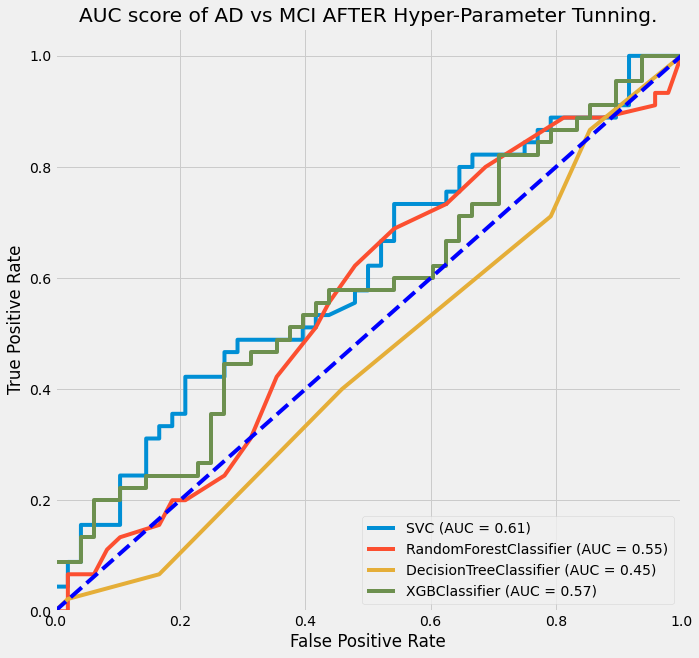

In [67]:
plt.style.use('fivethirtyeight')
# plotting ROC curve for each models.
plt.figure(figsize=(10,10))    
ax = plt.gca()
for i in finalClassifiers:
    plot_roc_curve(i, X_test_pca, y_test, ax=ax)
plt.plot([0, 1], [0, 1],'r--',color="blue")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])    
plt.title('AUC score of AD vs MCI AFTER Hyper-Parameter Tunning.')



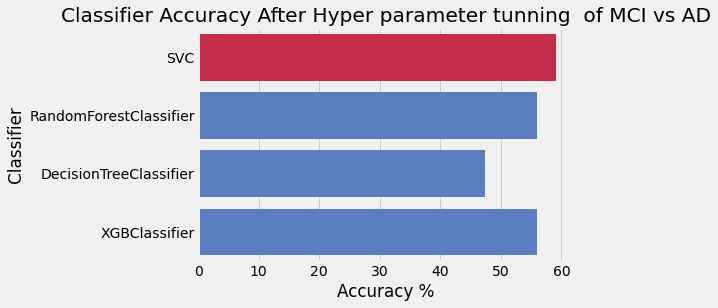

In [68]:


# comparing accuracys core of each models after hypeer parameter tunning .
sns.set_color_codes("muted")
clrs=set_custom_palette(final['Accuracy'],max_color = 'crimson', other_color = 'b')
sns.barplot(x='Accuracy', y='Classifier', data=final, palette=clrs,color="b",)

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy After Hyper parameter tunning  of MCI vs AD')
plt.show()



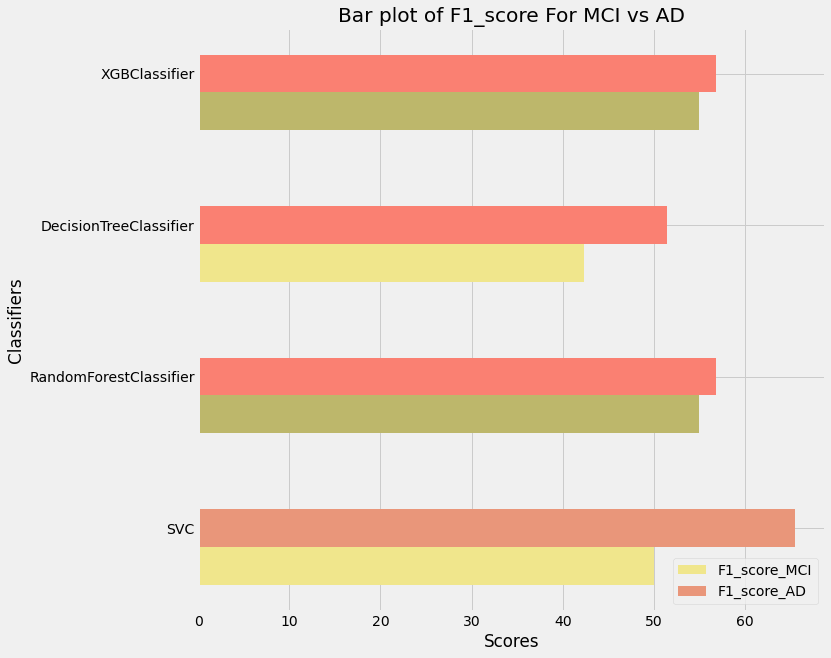

In [69]:

# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted

f1_mci = final["F1_score_NMCI"]
f1_ad = final["F1_score_AD"]

# Using numpy to group 3 different data with bars
X = np.arange(len(f1_nc))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
# changing color to dark khaki if it has highest value for f-score-nc
clrs = ["khaki" if (x < max(f1_mci)) else 'darkkhaki' for x in f1_mci ]
plt.barh(X, f1_mci, color = clrs, height = 0.25)
# changing color to dark salmon if it has highest value for f-score-ad
clrs = ["salmon" if (x < max(f1_ad)) else 'darksalmon' for x in f1_ad]
plt.barh(X + 0.25, f1_ad, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['F1_score_MCI', 'F1_score_AD'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of F1_score For MCI vs AD")
# Namimg the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

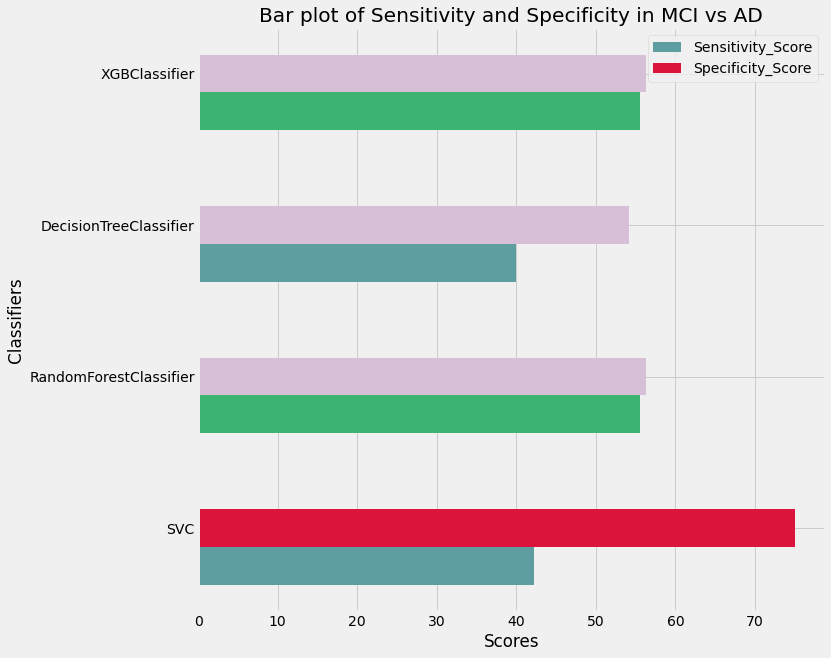

In [70]:
# Declaring the figure or the plot (y, x) or (width, height)
plt.figure(figsize=[10, 10])
# Data to be plotted
sensi = final["Sensitivity_Score"]
speci = final["Specificity Score"]

# Using numpy to group 3 different data with bars
X = np.arange(len(sensi))
# Passing the parameters to the bar function, this is the main function which creates the bar plot
# Using X now to align the bars side by side
clrs = ['cadetblue' if (x < max(sensi)) else 'mediumseagreen' for x in sensi ]
plt.barh(X, sensi, color = clrs, height = 0.25)
clrs = ['thistle' if (x < max(speci)) else 'crimson' for x in speci ]
plt.barh(X + 0.25, speci, color = clrs, height = 0.25)

# Creating the legend of the bars in the plot
plt.legend(['Sensitivity_Score', 'Specificity_Score'])

plt.yticks([i + 0.25 for i in range(4)], ["SVC","RandomForestClassifier","DecisionTreeClassifier","XGBClassifier"])
# Giving the tilte for the plot
plt.title("Bar plot of Sensitivity and Specificity in MCI vs AD")
# Naming the x and y axis
plt.ylabel('Classifiers')
plt.xlabel('Scores')
# Saving the plot as a 'png'
# plt.savefig('4BarPlot.png')
# Displaying the bar plot
plt.show()

# Feature Importance

## Feature importance testing by removing one measurement each time.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
# PredefinedSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 
from sklearn.svm import SVC as svc 
from sklearn.metrics import make_scorer, roc_auc_score
from scipy import stats
from sklearn.metrics import plot_roc_curve
import matplotlib.pyplot as plt

In [2]:
# loadings saved features that was prepared in data preparation file

from pickle import load
# load train_diagnose
train_diagnose= load(open('train_diagnose.pkl', 'rb'))
# load the NC data
fa_feature_all_locations_without_Nan = load(open('fa_feature_all_locations_without_Nan.pkl', 'rb'))
# load the NC_y data
md_feature_all_locations_without_Nan= load(open('md_feature_all_locations_without_Nan.pkl', 'rb'))

# load the AD_X data
rd_feature_all_locations_without_Nan= load(open('rd_feature_all_locations_without_Nan.pkl', 'rb'))
# load the AD_y data
ad_feature_all_locations_without_Nan= load(open('ad_feature_all_locations_without_Nan.pkl', 'rb'))

cl_feature_all_locations_without_Nan= load(open('cl_feature_all_locations_without_Nan.pkl', 'rb'))
# load the NC_y data
curvature_feature_all_locations_without_Nan= load(open('curvature_feature_all_locations_without_Nan.pkl', 'rb'))

# load the AD_X data
Torsion_feature_all_locations_without_Nan = load(open('Torsion_feature_all_locations_without_Nan.pkl', 'rb'))
# load the AD_y data
volume_feature_all_locations_without_Nan= load(open('volume_feature_all_locations_without_Nan.pkl', 'rb'))



# load the svc model
svc_final =load(open('svc_final_ADvsMCI_withVal.pkl', 'rb'))
# load the  randomforest
rf_final =load (open('rf_final_ADvsMCI_withVal.pkl', 'rb'))

# load the dt model
dt_final=load(open('dt_final_ADvsMCI_withVal.pkl', 'rb'))
# load the axgboost model
xgb_final= load (open('xgb_final_ADvsMCI_withVal.pkl', 'rb'))

In [3]:
from sklearn.pipeline import Pipeline
# creating a pipline to scale and redcue the dimensionality of all fetaures.
pipe = Pipeline([('scaler', MinMaxScaler(feature_range = (0, 1))),
                 ('pca', PCA(30))])

In [4]:
# applying the pipline to Fa feature to reduce its dimensilaity from 16000 to 30 
fa_feature_all_locations_scalPca=pipe.fit_transform(fa_feature_all_locations_without_Nan)
print(fa_feature_all_locations_scalPca.shape)
# applying the pipline to MD feature to reduce its dimensilaity from 16000 to 30 
md_feature_all_locations_scalPca=pipe.fit_transform(md_feature_all_locations_without_Nan)
print(md_feature_all_locations_scalPca.shape)
# applying the pipline to RD feature to reduce its dimensilaity from 16000 to 30 
rd_feature_all_locations_scalPca=pipe.fit_transform(rd_feature_all_locations_without_Nan)
print(rd_feature_all_locations_scalPca.shape)
# applying the pipline to AD feature to reduce its dimensilaity from 16000 to 30 
ad_feature_all_locations_scalPca=pipe.fit_transform(ad_feature_all_locations_without_Nan)
print(ad_feature_all_locations_scalPca.shape)
# applying the pipline to CL feature to reduce its dimensilaity from 16000 to 30 
cl_feature_all_locations_scalPca=pipe.fit_transform(cl_feature_all_locations_without_Nan)
print(cl_feature_all_locations_scalPca.shape)
# applying the pipline to curvature feature to reduce its dimensilaity from 16000 to 30 
curvature_feature_all_locations_scalPca=pipe.fit_transform(curvature_feature_all_locations_without_Nan)
print(curvature_feature_all_locations_scalPca.shape)
# applying the pipline to Torsion feature to reduce its dimensilaity from 16000 to 30 
Torsion_feature_all_locations_scalPca=pipe.fit_transform(Torsion_feature_all_locations_without_Nan)
print(Torsion_feature_all_locations_scalPca.shape)
# applying the pipline to Volume feature to reduce its dimensilaity from 16000 to 30 
volume_feature_all_locations_scalPca=pipe.fit_transform(volume_feature_all_locations_without_Nan)
print(volume_feature_all_locations_scalPca.shape)

(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)
(700, 30)


In [5]:
# correcting mistakes of not using replaced nan values 
combined_features_scalPca=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [6]:
# combining Features and train diagnose 
CombinedFeatDig=np.concatenate((combined_features_scalPca,train_diagnose),axis=1)

In [7]:
# separating NC,MCI and AD from the data
NC = np.where(CombinedFeatDig[:,-1] == 1)[0]
# NC shape after separting it from two other lables
print(NC.shape)

NMCI = np.where(CombinedFeatDig[:,-1] == 2)[0]
# MCI shape after separting it from two other lables
print(NMCI.shape)
# AD shape after separting it from two other lables
AD = np.where(CombinedFeatDig[:,-1] == 3)[0]
print(AD.shape)



(235,)
(215,)
(250,)


In [8]:
# X=combined_features_without_Scaling
# X.shape
y=train_diagnose
y.shape



NMCI_data_x =combined_features_scalPca[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_features_scalPca[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(215, 240)
(215, 1)
(250, 240)
(250, 1)


In [9]:
# combining AD and MCI
ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 240)
(465, 1)


In [10]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 240)
(93, 240)


In [11]:
finalClassifiers=[svc_final,rf_final,dt_final,xgb_final]

feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    feature_entry.append([accuracy*100])
    
#     featureImportance_df["Without_FA"]=feature_entry[0:4]
    FeatureImportance_all=pd.DataFrame(feature_entry[0:4],columns=["All Features"])

    
print("="*30)
FeatureImportance_all.head(5)

# # feature_entry[0:4]
# FeatureImportance_FA

SVC
****Results****
Training 93.01%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 64.52%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:36] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 56.99%


,All Features
0,63.440860
1,64.516129
2,53.763441
3,56.989247


## AD vs NMCI Training without FA

In [12]:
np.random.seed(500)
#removing Fa from the data
combined_FA_Ex=np.concatenate((md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [13]:
# X=combined_features_without_Scaling
# X.shape
y=train_diagnose
y.shape
NC_data_x = combined_FA_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_FA_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_FA_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [14]:
# combining AD and MCI
ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [15]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [16]:
# finalClassifiers = [svc_final, rf_final, dt_final,xgb_final]
# featureImportance_cols=["Classifiers"]
# featureImportance_df = pd.DataFrame(columns=featureImportance_cols)
# feature_entry=[]
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    feature_entry.append([accuracy*100])
    
#     featureImportance_df["Without_FA"]=feature_entry[0:4]
    FeatureImportance_FA=pd.DataFrame(feature_entry[0:4],columns=["Without_FA"])

    
print("="*30)
# featureImportance_df.head(5)

# feature_entry[0:4]
FeatureImportance_FA

SVC
****Results****
Training 91.94%
Accuracy 62.37%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 64.52%
DecisionTreeClassifier
****Results****
Training 72.85%
Accuracy 51.61%
[00:43:37] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 54.84%


,Without_FA
0,62.365591
1,64.516129
2,51.612903
3,54.838710


## AD vs NMCI Training without MD

In [17]:

#removing MD from the data
combined_MD_Ex=np.concatenate((fa_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [18]:


NMCI_data_x =combined_MD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_MD_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [19]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [21]:
# featureImportance_cols=["Classifiers","Without_FA"]
# featureImportance_df = pd.DataFrame(columns=featureImportance_cols)
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_MD=pd.DataFrame(feature_entry[0:4],columns=["Without_MA"])
    
print("="*30)
FeatureImportance_MD



SVC
****Results****
Training 92.74%
Accuracy 64.52%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 61.29%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:38] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 54.84%


,Without_MA
0,64.516129
1,61.290323
2,53.763441
3,54.838710


## AD vs NMCI Training without RD

In [22]:
#removing RD from the data
combined_RD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [23]:

NMCI_data_x =combined_RD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_RD_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [24]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [26]:

feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_RD=pd.DataFrame(feature_entry[0:4],columns=["Without_RD"])
    
print("="*30)
FeatureImportance_RD

SVC
****Results****
Training 92.47%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 63.44%
DecisionTreeClassifier
****Results****
Training 73.39%
Accuracy 53.76%
[00:43:39] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 60.22%


,Without_RD
0,63.440860
1,63.440860
2,53.763441
3,60.215054


In [27]:
def models_trining_testing(X_train,y_train,X_test,y_test):
    feature_entry=[]
    for models in finalClassifiers:
        models.fit(X_train, y_train.ravel())
        name = models.__class__.__name__
        print("="*30)
        print(name)
        print('****Results****')
        train_predictions = models.predict(X_test)
        trainingscore=models.score(X_train, y_train.ravel())
        accuracy = accuracy_score(y_test.ravel(), train_predictions)
        print("Training {:.2%}".format(trainingscore))
        print("Accuracy {:.2%}".format(accuracy))
        feature_entry.append([accuracy*100])
        FeatureImportance_RD=pd.DataFrame(feature_entry[0:4],columns=["Without_RD"])
    
# print("="*30)
# FeatureImportance_RD
testing=models_trining_testing(X_train,y_train,X_test,y_test)
testing

SVC
****Results****
Training 92.47%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 63.44%
DecisionTreeClassifier
****Results****
Training 73.39%
Accuracy 53.76%
[00:43:40] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 60.22%


# AD vs MCI Training without AD

In [28]:
#removing AD from the data
combined_AD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [29]:
NC_data_x = combined_AD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_AD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_AD_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [30]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [32]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_AD=pd.DataFrame(feature_entry[0:4],columns=["Without_AD"])
    
print("="*30)
FeatureImportance_AD

SVC
****Results****
Training 91.94%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 67.74%
DecisionTreeClassifier
****Results****
Training 73.66%
Accuracy 54.84%
[00:43:41] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 52.69%


,Without_AD
0,63.440860
1,67.741935
2,54.838710
3,52.688172


# AD vs MCI Training without CL

In [33]:
#removing cl from the data
combined_CL_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [34]:
NC_data_x = combined_CL_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CL_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_CL_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [35]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [37]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_CL=pd.DataFrame(feature_entry[0:4],columns=["Without_CL"])
    
print("="*30)
FeatureImportance_CL

SVC
****Results****
Training 92.47%
Accuracy 64.52%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 67.74%
DecisionTreeClassifier
****Results****
Training 72.04%
Accuracy 58.06%
[00:43:42] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 66.67%


,Without_CL
0,64.516129
1,67.741935
2,58.064516
3,66.666667


# AD vs MCI Training without Curvature

In [38]:
#removing Curvature from the data
combined_CUR_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [39]:
NC_data_x = combined_CUR_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CUR_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_CUR_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [40]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [42]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_cur=pd.DataFrame(feature_entry[0:4],columns=["Without_Curvature"])
    
print("="*30)
FeatureImportance_cur

SVC
****Results****
Training 91.40%
Accuracy 61.29%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 62.37%
DecisionTreeClassifier
****Results****
Training 72.31%
Accuracy 52.69%
[00:43:43] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 61.29%


,Without_Curvature
0,61.290323
1,62.365591
2,52.688172
3,61.290323


# AD vs MCI Training without Torsion

In [43]:
#removing Torsion from the data
combined_Tor_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        volume_feature_all_locations_scalPca),axis=1)

In [44]:
NC_data_x = combined_Tor_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Tor_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_Tor_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [45]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [46]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [47]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_tor=pd.DataFrame(feature_entry[0:4],columns=["Without_Torsion"])
    
print("="*30)
FeatureImportance_tor

SVC
****Results****
Training 92.74%
Accuracy 63.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 65.59%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:44] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 59.14%


,Without_Torsion
0,63.440860
1,65.591398
2,53.763441
3,59.139785


# AD vs MCI Training without Volume

In [48]:
#removing Volume from the data
combined_Vol_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca),axis=1)

In [49]:
NC_data_x = combined_Vol_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Vol_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)

AD_data_x = combined_Vol_Ex[AD]
AD_data_y = y[AD]

print(AD_data_x.shape)
print(AD_data_y.shape)


(235, 210)
(235, 1)
(215, 210)
(215, 1)
(250, 210)
(250, 1)


In [50]:

ADvsNMCI_X=np.concatenate((AD_data_x, NMCI_data_x), axis=0)
print(ADvsNMCI_X.shape)

ADvsNMCI_Y=np.concatenate((AD_data_y, NMCI_data_y), axis=0)
print(ADvsNMCI_Y.shape)

(465, 210)
(465, 1)


In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(ADvsNMCI_X,ADvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(372, 210)
(93, 210)


In [52]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_vol=pd.DataFrame(feature_entry[0:4],columns=["Without_Volume"])
    classifierss=["SVM","Random_Forest","Decision_Tree","XG_Boost"]
    classifierss_df=pd.DataFrame(classifierss[0:4],columns=["Models"])
    
print("="*30)
FeatureImportance_all=pd.concat((classifierss_df,FeatureImportance_all,FeatureImportance_FA,FeatureImportance_MD,FeatureImportance_RD,FeatureImportance_AD,FeatureImportance_CL,FeatureImportance_cur,FeatureImportance_tor,FeatureImportance_vol),axis=1)
# FeatureImportance_all
df_t = FeatureImportance_all.T
#grab the first row for the column
df_t=df_t.rename(columns=df_t.iloc[0])
df_t=df_t[1:] #take the data less the header row
df_t


SVC
****Results****
Training 90.32%
Accuracy 69.89%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 62.37%
DecisionTreeClassifier
****Results****
Training 73.92%
Accuracy 53.76%
[00:43:45] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


XGBClassifier
****Results****
Training 100.00%
Accuracy 65.59%


,SVM,Random_Forest,Decision_Tree,XG_Boost
All Features,63.4409,64.5161,53.7634,56.9892
Without_FA,62.3656,64.5161,51.6129,54.8387
Without_MA,64.5161,61.2903,53.7634,54.8387
Without_RD,63.4409,63.4409,53.7634,60.2151
Without_AD,63.4409,67.7419,54.8387,52.6882
Without_CL,64.5161,67.7419,58.0645,66.6667
Without_Curvature,61.2903,62.3656,52.6882,61.2903
Without_Torsion,63.4409,65.5914,53.7634,59.1398
Without_Volume,69.8925,62.3656,53.7634,65.5914


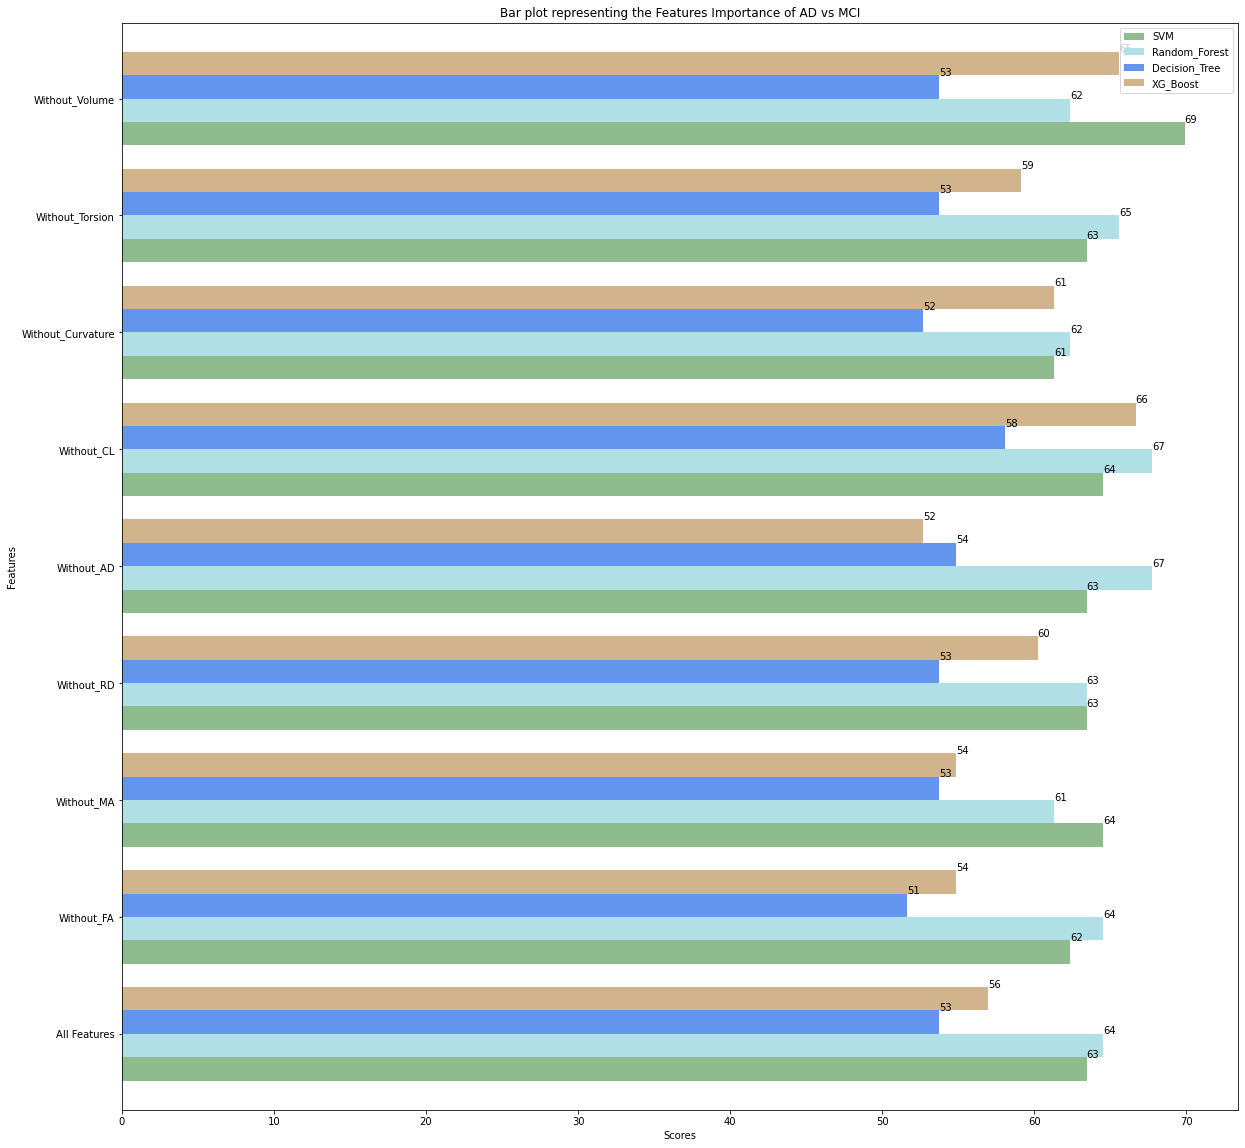

In [53]:
barplot=df_t.plot(kind='barh',figsize=(20,20),width=.8,color=["darkseagreen","powderblue","cornflowerblue","tan"])

# for loop to get the accuracy text label by using the widthvalue of the bars
for p in barplot.patches:
                _x = p.get_x() + p.get_width() 
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                barplot.text(_x, _y, value, ha="left")
# Giving the title for the plot
plt.title("Bar plot representing the Features Importance of AD vs MCI")
# Namimg the x and y axis
plt.ylabel('Features')
plt.xlabel('Scores')
plt.show()

# NC vs MCI  Feature Importance.

## Feature importance testing by removing one measurement each time.

In [54]:

combined_features_withScalPCA=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [55]:
# load the svc model
svc_final =load(open('svc_final_NCvsMCI_withVal.pkl', 'rb'))
# load the  randomforest
rf_final =load (open('rf_final_NCvsMCI_withVal.pkl', 'rb'))

# load the dt model
dt_final=load(open('dt_final_NCvsMCI_withVal.pkl', 'rb'))
# load the axgboost model
xgb_final= load (open('xgb_final_NCvsMCI_withVal.pkl', 'rb'))

In [56]:
# Normal Control vs MCI
y=train_diagnose
y.shape
NC_data_x = combined_features_withScalPCA[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_features_withScalPCA[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 240)
(235, 1)
(215, 240)
(215, 1)


In [57]:
# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 240)
(450, 1)


In [58]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)



(360, 240)
(90, 240)


In [59]:
finalClassifiers=[svc_final,rf_final,dt_final,xgb_final]

feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
    feature_entry.append([accuracy*100])
    

    FeatureImportance_all=pd.DataFrame(feature_entry[0:4],columns=["All Features"])

    
print("="*30)
FeatureImportance_all.head(5)


SVC
****Results****
Training 94.72%
Accuracy 53.33%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 58.89%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 100.00%
Accuracy 56.67%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,All Features
0,53.333333
1,58.888889
2,53.333333
3,56.666667


## NC vs NMCI Training without FA

In [60]:

#removing Fa from the data
combined_FA_Ex=np.concatenate((md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [61]:
# X=combined_features_without_Scaling
# X.shape
y=train_diagnose
y.shape
NC_data_x = combined_FA_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_FA_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [62]:
# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [63]:
from sklearn.model_selection import train_test_split
# splitting data into tarining , testing .
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [64]:
# making a list tos ave the result to it
feature_entry=[]
# for loop for traning and testing of the four models
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
#     appeending the accauracy of the models into the feature_entry
    feature_entry.append([accuracy*100])
# saving the feature importanc einto data frame.
    FeatureImportance_FA=pd.DataFrame(feature_entry[0:4],columns=["Without_FA"])

    
print("="*30)

FeatureImportance_FA

SVC
****Results****
Training 94.72%
Accuracy 55.56%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 56.67%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 99.72%
Accuracy 58.89%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_FA
0,55.555556
1,56.666667
2,53.333333
3,58.888889


## NC  vs NMCI Training without MD

In [65]:

#removing MD from the data
combined_MD_Ex=np.concatenate((fa_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [66]:
NC_data_x = combined_MD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_MD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [67]:
# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [68]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [69]:
# list to save the accuarcy of the models
feature_entry=[]

# for loop for training and testing all four models and then saving teh result to the list mentioned above
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    # appending the accauracy of the models into the feature_entry
    feature_entry.append([accuracy*100])
    # saving the feature importanc einto data frame.

    FeatureImportance_MD=pd.DataFrame(feature_entry[0:4],columns=["Without_MA"])
    
print("="*30)
FeatureImportance_MD



SVC
****Results****
Training 96.11%
Accuracy 54.44%
RandomForestClassifier
****Results****
Training 100.00%
Accuracy 60.00%
DecisionTreeClassifier
****Results****
Training 73.06%
Accuracy 55.56%
XGBClassifier
****Results****
Training 100.00%
Accuracy 54.44%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_MA
0,54.444444
1,60.000000
2,55.555556
3,54.444444


## NC  vs NMCI Training without RD

In [70]:
#removing RD from the data
combined_RD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [71]:
NC_data_x = combined_RD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_RD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [72]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [74]:
 # list to save the accuarcy of the models
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))
  
    # appending the accauracy of the models into the feature_entry
    feature_entry.append([accuracy*100])
    # saving the feature importanc einto data frame.

    FeatureImportance_RD=pd.DataFrame(feature_entry[0:4],columns=["Without_RD"])
    
print("="*30)
FeatureImportance_RD

SVC
****Results****
Training 95.83%
Accuracy 55.56%
RandomForestClassifier
****Results****
Training 99.72%
Accuracy 52.22%
DecisionTreeClassifier
****Results****
Training 71.94%
Accuracy 51.11%
XGBClassifier
****Results****
Training 100.00%
Accuracy 61.11%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_RD
0,55.555556
1,52.222222
2,51.111111
3,61.111111


# NC  vs MCI Training without AD

In [75]:
#removing AD from the data
combined_AD_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [76]:
NC_data_x = combined_AD_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_AD_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [77]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [78]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [79]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_AD=pd.DataFrame(feature_entry[0:4],columns=["Without_AD"])
    
print("="*30)
FeatureImportance_AD

SVC
****Results****
Training 94.17%
Accuracy 52.22%
RandomForestClassifier
****Results****
Training 98.89%
Accuracy 57.78%
DecisionTreeClassifier
****Results****
Training 69.17%
Accuracy 48.89%
XGBClassifier
****Results****
Training 100.00%
Accuracy 57.78%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_AD
0,52.222222
1,57.777778
2,48.888889
3,57.777778


# NC vs MCI Training without CL

In [80]:
#removing cl from the data
combined_CL_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [81]:
NC_data_x = combined_CL_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CL_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)



(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [82]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [84]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_CL=pd.DataFrame(feature_entry[0:4],columns=["Without_CL"])
    
print("="*30)
FeatureImportance_CL

SVC
****Results****
Training 93.06%
Accuracy 52.22%
RandomForestClassifier
****Results****
Training 99.44%
Accuracy 55.56%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 100.00%
Accuracy 56.67%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_CL
0,52.222222
1,55.555556
2,53.333333
3,56.666667


# NC  vs MCI Training without Curvature

In [85]:
#removing Curvature from the data
combined_CUR_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca,volume_feature_all_locations_scalPca),axis=1)

In [86]:
NC_data_x = combined_CUR_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_CUR_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)



(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [87]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [89]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_cur=pd.DataFrame(feature_entry[0:4],columns=["Without_Curvature"])
    
print("="*30)
FeatureImportance_cur

SVC
****Results****
Training 93.61%
Accuracy 54.44%
RandomForestClassifier
****Results****
Training 97.50%
Accuracy 53.33%
DecisionTreeClassifier
****Results****
Training 69.44%
Accuracy 53.33%
XGBClassifier
****Results****
Training 99.72%
Accuracy 57.78%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_Curvature
0,54.444444
1,53.333333
2,53.333333
3,57.777778


# NC vs MCI Training without Torsion

In [90]:
#removing Torsion from the data
combined_Tor_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        volume_feature_all_locations_scalPca),axis=1)

In [91]:
NC_data_x = combined_Tor_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Tor_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)




(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [92]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [93]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [94]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_tor=pd.DataFrame(feature_entry[0:4],columns=["Without_Torsion"])
    
print("="*30)
FeatureImportance_tor

SVC
****Results****
Training 93.89%
Accuracy 53.33%
RandomForestClassifier
****Results****
Training 97.50%
Accuracy 53.33%
DecisionTreeClassifier
****Results****
Training 71.39%
Accuracy 53.33%
XGBClassifier
****Results****
Training 100.00%
Accuracy 60.00%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,Without_Torsion
0,53.333333
1,53.333333
2,53.333333
3,60.000000


# NC  vs MCI Training without Volume

In [95]:
#removing Volume from the data
combined_Vol_Ex=np.concatenate((fa_feature_all_locations_scalPca,md_feature_all_locations_scalPca,rd_feature_all_locations_scalPca, 
                        ad_feature_all_locations_scalPca,cl_feature_all_locations_scalPca,curvature_feature_all_locations_scalPca,
                        Torsion_feature_all_locations_scalPca),axis=1)

In [96]:
NC_data_x = combined_Vol_Ex[NC]
NC_data_y = y[NC]

print(NC_data_x.shape)
print(NC_data_y.shape)


NMCI_data_x =combined_Vol_Ex[NMCI]
NMCI_data_y = y[NMCI]

print(NMCI_data_x.shape)
print(NMCI_data_y.shape)



(235, 210)
(235, 1)
(215, 210)
(215, 1)


In [97]:

# Normal control and MCI
NCvsNMCI_X=np.concatenate((NC_data_x, NMCI_data_x), axis=0)
print(NCvsNMCI_X.shape)

NCvsNMCI_Y=np.concatenate((NC_data_y, NMCI_data_y), axis=0)
print(NCvsNMCI_Y.shape)

(450, 210)
(450, 1)


In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(NCvsNMCI_X,NCvsNMCI_Y, test_size=0.20, random_state=123)
print(X_train.shape)
print(X_test.shape)


(360, 210)
(90, 210)


In [99]:
feature_entry=[]
for models in finalClassifiers:
    models.fit(X_train, y_train.ravel())
    name = models.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = models.predict(X_test)
    trainingscore=models.score(X_train, y_train.ravel())
    accuracy = accuracy_score(y_test.ravel(), train_predictions)
    print("Training {:.2%}".format(trainingscore))
    print("Accuracy {:.2%}".format(accuracy))

    feature_entry.append([accuracy*100])

    FeatureImportance_vol=pd.DataFrame(feature_entry[0:4],columns=["Without_Volume"])
    classifierss=["SVM","Random_Forest","Decision_Tree","XG_Boost"]
    classifierss_df=pd.DataFrame(classifierss[0:4],columns=["Models"])
    
print("="*30)
FeatureImportance_all=pd.concat((classifierss_df,FeatureImportance_all,FeatureImportance_FA,FeatureImportance_MD,FeatureImportance_RD,FeatureImportance_AD,FeatureImportance_CL,FeatureImportance_cur,FeatureImportance_tor,FeatureImportance_vol),axis=1)
# FeatureImportance_all
df_t = FeatureImportance_all.T
#grab the first row for the column
df_t=df_t.rename(columns=df_t.iloc[0])
df_t=df_t[1:] #take the data less the header row
df_t


SVC
****Results****
Training 92.78%
Accuracy 54.44%
RandomForestClassifier
****Results****
Training 99.17%
Accuracy 56.67%
DecisionTreeClassifier
****Results****
Training 71.11%
Accuracy 41.11%
XGBClassifier
****Results****
Training 100.00%
Accuracy 61.11%


/opt/anaconda3/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


,SVM,Random_Forest,Decision_Tree,XG_Boost
All Features,53.3333,58.8889,53.3333,56.6667
Without_FA,55.5556,56.6667,53.3333,58.8889
Without_MA,54.4444,60,55.5556,54.4444
Without_RD,55.5556,52.2222,51.1111,61.1111
Without_AD,52.2222,57.7778,48.8889,57.7778
Without_CL,52.2222,55.5556,53.3333,56.6667
Without_Curvature,54.4444,53.3333,53.3333,57.7778
Without_Torsion,53.3333,53.3333,53.3333,60
Without_Volume,54.4444,56.6667,41.1111,61.1111


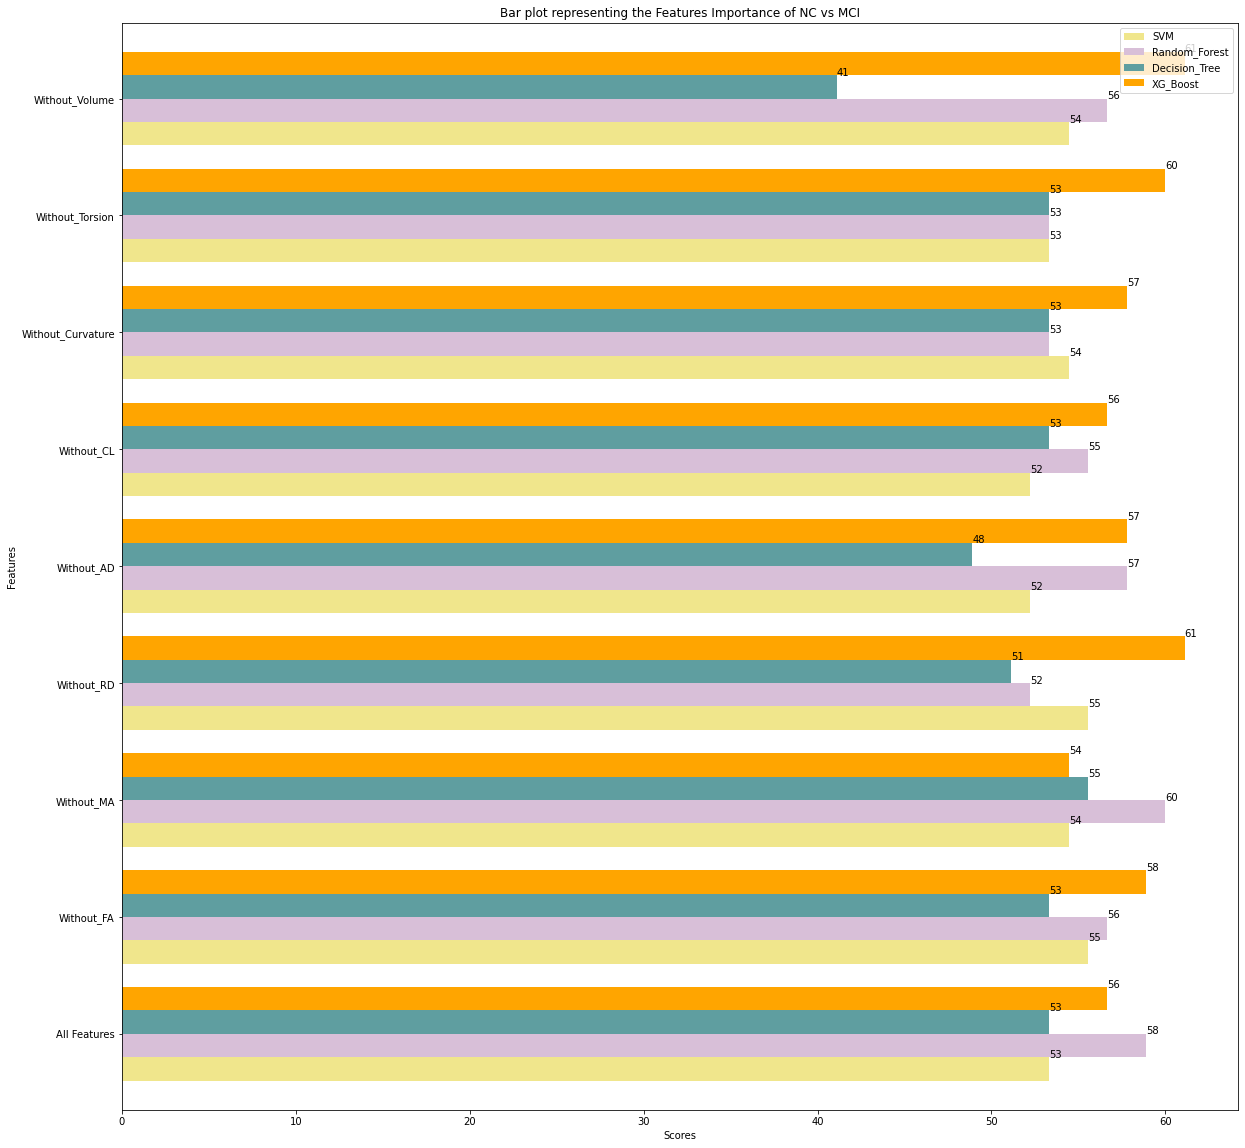

In [100]:
barplot=df_t.plot(kind='barh',figsize=(20,20),width=.8,color=["khaki","thistle","cadetblue","orange"])

for p in barplot.patches:
                _x = p.get_x() + p.get_width() 
               
                _y = p.get_y() + p.get_height()

                value = int(p.get_width())
                barplot.text(_x, _y, value, ha="left")
# Giving the title for the plot
plt.title("Bar plot representing the Features Importance of NC vs MCI")
# Namimg the x and y axis
plt.ylabel('Features')
plt.xlabel('Scores')
plt.show()
